In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OneHotEncoder

In [8]:
#df_cred_a = pd.read_csv('/content/drive/MyDrive/loan_data_2007_2014.csv')
#df_cred.head(2)

df_cred = pd.read_csv('/content/drive/MyDrive/loan_data_2007_2014.csv')
df_cred.head(2)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Data Understanding**

In [9]:
df_cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

# **Missing Values**

In [10]:
full_non_null = [col for col in df_cred.columns if df_cred[col].isnull().all()]
print(full_non_null)
print(len(full_non_null),"column(s)")

['annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m']
17 column(s)




*   dapat diketahui ada 17 colum non null dan langkah selanjutnya adalah melakukan drop tabel pada colum non null




In [11]:
df_cred = df_cred.drop(axis=1, columns=full_non_null)
df_cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 58 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [12]:
percent_missing = df_cred.isnull().sum() * 100 / len(df_cred)
dtypes=[df_cred[col].dtype for col in df_cred.columns]
missing_value_df = pd.DataFrame({'data_type':dtypes,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df.head(10)

,data_type,percent_missing
mths_since_last_record,float64,86.566585
mths_since_last_major_derog,float64,78.773926
desc,object,72.981975
mths_since_last_delinq,float64,53.690554
next_pymnt_d,object,48.728567
tot_cur_bal,float64,15.071469
total_rev_hi_lim,float64,15.071469
tot_coll_amt,float64,15.071469
emp_title,object,5.916553
emp_length,object,4.505399


Nilai yang hilang > 50%:

* mths_since_last_record = Jumlah bulan sejak catatan publik terakhir
* mths_since_last_major_derog = Bulan sejak peringkat 90 hari terakhir atau lebih buruk
* desc = Deskripsi pinjaman yang diberikan oleh peminjam
* mths_since_last_delinq = Jumlah bulan sejak tunggakan terakhir peminjam

Nilai yang hilang 40% - 50%:
* next_payment_d = Pembayaran bulan terakhir diterima

Nilai yang hilang 1% - 20%
* tot_cur_bal = Total saldo saat ini dari semua akun
* tot_coll_amt = Total jumlah penagihan yang pernah terutang
* total_rev_hi_lim = Total kredit tinggi bergulir/batas kredit
* emp_title = Jabatan yang diberikan oleh Peminjam saat mengajukan pinjaman.
* emp_length = Lamanya pekerjaan dalam tahun. Nilai yang mungkin adalah antara 0 dan 10 di mana 0 berarti kurang dari satu tahun dan 10 berarti sepuluh tahun atau lebih.






























In [13]:
missing_value_df.tail(48)

,data_type,percent_missing
last_pymnt_d,object,0.080637
revol_util,float64,0.072917
collections_12_mths_ex_med,float64,0.031097
last_credit_pull_d,object,0.009007
earliest_cr_line,object,0.006219
pub_rec,float64,0.006219
open_acc,float64,0.006219
inq_last_6mths,float64,0.006219
delinq_2yrs,float64,0.006219
acc_now_delinq,float64,0.006219


Nilai yang hilang di bawah 1%:

*   last_pymnt_d = Bulan terakhir pembayaran diterima
*   revol_util = Tingkat pemanfaatan jalur bergulir, atau jumlah kredit yang digunakan peminjam relatif terhadap semua kredit bergulir yang tersedia
*   collections_12_mths_ex_med = Jumlah penagihan dalam 12 bulan tidak termasuk penagihan medis
*   last_credit_pull_d = Bulan terakhir LC menarik kredit untuk pinjaman ini
*   pub_rec = Jumlah catatan publik yang merugikan
*   inq_last_6mths
*   delinq_2yrs
*   open_acc = Jumlah jalur kredit terbuka dalam berkas kredit peminjam
*   earliest_cr_line = Bulan pembukaan jalur kredit peminjam yang dilaporkan paling awal
*   acc_now_delinq = Jumlah akun yang saat ini menunggak oleh peminjam
*   total_acc = Jumlah total jalur kredit yang saat ini ada dalam berkas kredit peminjam
*   title object
















# **Duplicated Data**

In [14]:
df_cred.duplicated().sum()

np.int64(0)

*   Tidak ada data duplikat dalam dataset




# **Data Preparation**

## Handling Missing Values

*   Menghapus mths_since_last_record, desc, dan next_pymnt_d




In [15]:
df_cred = df_cred[df_cred.columns[~df_cred.columns.isin(['mths_since_last_record','desc','next_pymnt_d'])]]
df_cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [16]:
df_cred.head(2)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-15,171.62,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,Sep-13,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN


## Imputation

*   Untuk mths_since_last_major_derog dan mths_since_last_delinq (nilai yang hilang di atas 50%), saya imputasikan dengan nilai "0" (zero)
*   Untuk yang lain, saya menggunakan nilai mediannya untuk fitur numerik dan modus untuk fitur kategoris.



In [17]:
for col in ['mths_since_last_major_derog','mths_since_last_delinq']:
    df_cred[col] = df_cred[col].fillna(0)


In [18]:
df_cred[['mths_since_last_major_derog','mths_since_last_delinq']].isnull().sum()

,0
mths_since_last_major_derog,0
mths_since_last_delinq,0


In [19]:
# numerical columns
for col in df_cred.select_dtypes(exclude='object'):
    df_cred[col] = df_cred[col].fillna(df_cred[col].median())
df_cred.isnull().sum()

,0
Unnamed: 0,0
id,0
member_id,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
grade,0


In [20]:
# Non numerical columns
for col in df_cred.select_dtypes(include='object'):
    df_cred[col] = df_cred[col].fillna(df_cred[col].mode().iloc[0])
print("Updated Missing Values")
df_cred.isnull().sum()

Updated Missing Values


,0
Unnamed: 0,0
id,0
member_id,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
grade,0


In [21]:
df_cred.head(3)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,Teacher,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,0.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-15,171.62,Jan-16,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,0.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,Sep-13,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,Teacher,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,0.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,Jun-14,649.91,Jan-16,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0


## Checking Unique Values

In [22]:
print("Unique Features (Numerical)")
print(df_cred.select_dtypes(exclude='object').nunique())


Unique Features (Numerical)
Unnamed: 0                     466285
id                             466285
member_id                      466285
loan_amnt                        1352
funded_amnt                      1354
funded_amnt_inv                  9854
int_rate                          506
installment                     55622
annual_inc                      31901
dti                              3997
delinq_2yrs                        24
inq_last_6mths                     28
mths_since_last_delinq            145
open_acc                           62
pub_rec                            26
revol_bal                       58142
revol_util                       1269
total_acc                         112
out_prncp                      135665
out_prncp_inv                  141189
total_pymnt                    351609
total_pymnt_inv                347659
total_rec_prncp                172713
total_rec_int                  270249
total_rec_late_fee               5808
recoveries            



*   Unnamed: 0, id, and member_id bersifat unique untuk setiap baris
*   policy_code hanya memiliki satu unique value



In [23]:
print("Unique Features (Categorical)")
print(df_cred.select_dtypes(exclude=['int','float']).nunique())

Unique Features (Categorical)
term                        2
grade                       7
sub_grade                  35
emp_title              205475
emp_length                 11
home_ownership              6
verification_status         3
issue_d                    91
loan_status                 9
pymnt_plan                  2
url                    466285
purpose                    14
title                   63098
zip_code                  888
addr_state                 50
earliest_cr_line          664
initial_list_status         2
last_pymnt_d               98
last_credit_pull_d        103
application_type            1
dtype: int64


*   emp_title, url,title, zip_code, earliest_cr_line memiliki lebih banyak 500 unique values
*   last_credit_pull_d,last_pymnt_d,issue_d,addr_state memiliki setidaknya 50 unique values (dibawah 500)
*   application_type hanya memiliki satu unique value






In [24]:
df_cred["term"].unique()

array([' 36 months', ' 60 months'], dtype=object)

membersihkan spasi kosong

In [25]:
def word_strip(x):
  return x.strip()

df_cred['term'] = df_cred['term'].apply(lambda x: word_strip(x))
df_cred["term"].unique()

array(['36 months', '60 months'], dtype=object)

In [26]:
df_cred["grade"].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [27]:
df_cred["sub_grade"].unique()

array(['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F4', 'F1', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5', 'G5'], dtype=object)

In [28]:
df_cred["emp_length"].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years'],
      dtype=object)

In [29]:
df_cred["home_ownership"].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [30]:
df_cred["home_ownership"].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [31]:
df_cred["purpose"].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

## Formatting Target Variable

*   loan_status akan menjadi variabel target
*   saya tidak dapat mengimplementasikannya secara langsung pada 9 unique values
*   Saya akan mengelompokkannya ke dalam grup untuk klasifikasi biner




In [32]:
df_cred["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

*   Good Loan (1) : Fully Paid, Does not meet the credit policy. Status:Fully Paid
*   Bad Loan (0) : Charged Off, Does not meet the credit policy. Status:Charged Off, Default, Late (31-120 days)
*   Undetachable Loan (-1) : Current, In Grace Period, Late (16-30 days)

*   Saya akan menggunakan Good Loan (1) dan Bad Loan (0) nanti untuk klasifikasi biner

*   Nantinya, kolom Undetachable Loan (-1) akan dihilangkan karena masih merupakan pinjaman yang sedang berjalan dan belum bisa dideteksi sebagai baik atau buruk.

In [33]:
# Define a dictionary for encoding target variable
target_dict = {'Fully Paid':1,
               'Does not meet the credit policy. Status:Fully Paid':1,
               'Charged Off':0,
               'Does not meet the credit policy. Status:Charged Off':0,
               'Default':0,
               'Late (31-120 days)':0,
               'Current':-1,
               'In Grace Period':-1,
               'Late (16-30 days)':-1}
# Create the mapped values in a new column
df_cred['loan_status'] = df_cred['loan_status'].map(target_dict)
# Review dataset
df_cred.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,Teacher,10+ years,RENT,24000.0,Verified,Dec-11,1,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,0.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,Jan-16,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,0,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,0.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,Teacher,10+ years,RENT,12252.0,Not Verified,Dec-11,1,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,0.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,Jan-16,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,1,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Jan-15,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,-1,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Jan-16,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0


In [34]:
df_cred = df_cred.loc[~df_cred['loan_status'].isin([-1])].reset_index(drop=True)
df_cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237695 entries, 0 to 237694
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   237695 non-null  int64  
 1   id                           237695 non-null  int64  
 2   member_id                    237695 non-null  int64  
 3   loan_amnt                    237695 non-null  int64  
 4   funded_amnt                  237695 non-null  int64  
 5   funded_amnt_inv              237695 non-null  float64
 6   term                         237695 non-null  object 
 7   int_rate                     237695 non-null  float64
 8   installment                  237695 non-null  float64
 9   grade                        237695 non-null  object 
 10  sub_grade                    237695 non-null  object 
 11  emp_title                    237695 non-null  object 
 12  emp_length                   237695 non-null  object 
 13 

In [35]:
df_cred.tail()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
237690,466276,9695736,11547808,8525,8525,8525.0,60 months,18.25,217.65,D,D3,MANAGER,5 years,MORTGAGE,37536.0,Verified,Jan-14,0,n,https://www.lendingclub.com/browse/loanDetail....,medical,Medical expenses,011xx,MA,12.28,4.0,Nov-94,0.0,3.0,12.0,0.0,5318,10.7,26.0,f,0.0,0.0,2029.930000,2029.93,360.08,510.45,0.0,1159.4,11.594,May-14,217.65,Oct-14,0.0,4.0,1,INDIVIDUAL,0.0,0.0,116995.0,49800.0
237691,466277,9007579,10799568,18000,18000,17975.0,36 months,7.90,563.23,A,A4,sales rep,3 years,RENT,90000.0,Verified,Jan-14,0,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,my loan,212xx,MD,10.33,1.0,Jul-98,0.0,14.0,16.0,0.0,8224,16.3,33.0,f,0.0,0.0,5631.670000,5623.85,4580.89,1050.78,0.0,0.0,0.000,Nov-14,563.23,Oct-14,0.0,14.0,1,INDIVIDUAL,0.0,0.0,42592.0,50300.0
237692,466278,9745590,11597671,10000,10000,10000.0,36 months,18.25,362.78,D,D3,MecÃ¡nica,10+ years,RENT,42000.0,Source Verified,Jan-14,1,n,https://www.lendingclub.com/browse/loanDetail....,vacation,Vacation,201xx,VA,11.57,0.0,Jun-02,0.0,29.0,9.0,0.0,3196,28.8,24.0,f,0.0,0.0,12394.165200,12394.17,10000.00,2394.17,0.0,0.0,0.000,Sep-15,5501.60,Jan-16,0.0,32.0,1,INDIVIDUAL,0.0,0.0,10170.0,11100.0
237693,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,D5,Chief of Interpretation (Park Ranger),10+ years,MORTGAGE,78000.0,Verified,Jan-14,0,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Debt consolidation,377xx,TN,18.45,0.0,Jun-97,5.0,0.0,18.0,1.0,18238,46.3,30.0,f,0.0,0.0,4677.920000,4677.92,1837.04,2840.88,0.0,0.0,0.000,Dec-14,17.50,Jan-16,0.0,0.0,1,INDIVIDUAL,0.0,0.0,221830.0,39400.0
237694,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,A4,Server Engineer Lead,3 years,OWN,83000.0,Verified,Jan-14,1,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Credit card refinancing,913xx,CA,5.39,3.0,Feb-03,1.0,13.0,21.0,0.0,11404,21.5,27.0,w,0.0,0.0,2126.579838,2126.58,2000.00,126.58,0.0,0.0,0.000,Dec-14,1500.68,Apr-15,0.0,0.0,1,INDIVIDUAL,0.0,0.0,591610.0,53100.0


## Datetime setting

In [36]:
# The month the borrower's earliest reported credit line was opened
df_cred['earliest_cr_line'].value_counts()

,count
earliest_cr_line,
Oct-00,2056
Oct-99,1883
Nov-00,1847
Oct-01,1840
Nov-99,1807
...,...
Jun-60,1
Dec-58,1
Aug-64,1


In [37]:
df_cred['earliest_cr_line'] = pd.to_datetime(df_cred['earliest_cr_line'], format='%b-%y')

In [38]:
# The most recent month LC pulled credit for this loan
df_cred['last_credit_pull_d'].value_counts()

,count
last_credit_pull_d,
Jan-16,100503
Dec-15,13771
Nov-15,8233
Sep-15,7982
Oct-15,7846
Jul-15,7282
Aug-15,6521
Jun-15,6159
Apr-15,5661


In [39]:
# Last month payment was received
df_cred['last_pymnt_d'].value_counts()

,count
last_pymnt_d,
Jul-15,11703
Oct-15,11248
Sep-15,10204
Mar-15,10087
Jun-15,10078
Apr-15,10051
Aug-15,9939
May-15,9618
Nov-15,9280


In [40]:
# The month which the loan was funded
df_cred['issue_d'].value_counts()

,count
issue_d,
Oct-14,9704
Jul-14,9226
Apr-14,7121
Nov-13,6904
Dec-13,6893
Oct-13,6876
May-14,6825
Jan-14,6818
Aug-13,6569


In [41]:
df_cred[['issue_d','last_pymnt_d','last_credit_pull_d']].head(3)

,issue_d,last_pymnt_d,last_credit_pull_d
0,Dec-11,Jan-15,Jan-16
1,Dec-11,Apr-13,Sep-13
2,Dec-11,Jun-14,Jan-16


In [42]:
def date_time(dt):
  if dt.year > 2016:
    dt = dt.replace(year=dt.year-100)
  return dt

In [43]:
# Set standard datetime
df_cred['earliest_cr_line'] = pd.to_datetime(df_cred['earliest_cr_line'], format='%b-%y') # The month the borrower's earliest reported credit line was opened
df_cred['earliest_cr_line'] = df_cred['earliest_cr_line'].apply(lambda x: date_time(x))
df_cred['issue_d'] = pd.to_datetime(df_cred['issue_d'], format='%b-%y') # The month which the loan was funded
df_cred['last_pymnt_d'] = pd.to_datetime(df_cred['last_pymnt_d'],format='%b-%y') # Last month payment was received
df_cred['last_credit_pull_d'] = pd.to_datetime(df_cred['last_credit_pull_d'],format='%b-%y') # The most recent month LC pulled credit for this loan
df_cred[['earliest_cr_line','issue_d','last_pymnt_d','last_credit_pull_d']].head(3)

,earliest_cr_line,issue_d,last_pymnt_d,last_credit_pull_d
0,1985-01-01,2011-12-01,2015-01-01,2016-01-01
1,1999-04-01,2011-12-01,2013-04-01,2013-09-01
2,2001-11-01,2011-12-01,2014-06-01,2016-01-01


Membuat kolom baru untuk datetime:
*   pymnt_time = jumlah bulan antara pinjaman yang didanai (issue_d) dan pembayaran terakhir yang diterima (last_pymnt_d)
*   credit_pull_year = jumlah tahun antara pembukaan jalur kredit paling awal yang dilaporkan peminjam (earliest_cr_line) dan penarikan kredit LC terbaru untuk pinjaman ini (last_credit_pull_d)



In [44]:
def diff_month(d1, d2):
    return (d1.year - d2.year) * 12 + d1.month - d2.month

In [45]:
def diff_year(d1, d2):
    return (d1.year - d2.year)

In [46]:
((df_cred.apply(lambda x: diff_month(x.last_pymnt_d, x.issue_d), axis=1) < 0)).any().any()

np.False_

In [47]:
((df_cred.apply(lambda x: diff_month(x.last_credit_pull_d, x.earliest_cr_line), axis=1) < 0)).any().any()

np.False_

In [48]:
df_cred['pymnt_time'] = df_cred.apply(lambda x: diff_month(x.last_pymnt_d, x.issue_d), axis=1)
df_cred['credit_pull_year'] = df_cred.apply(lambda x: diff_year(x.last_credit_pull_d, x.earliest_cr_line), axis=1)
print('Adding features succeed')

Adding features succeed


In [49]:
df_cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237695 entries, 0 to 237694
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Unnamed: 0                   237695 non-null  int64         
 1   id                           237695 non-null  int64         
 2   member_id                    237695 non-null  int64         
 3   loan_amnt                    237695 non-null  int64         
 4   funded_amnt                  237695 non-null  int64         
 5   funded_amnt_inv              237695 non-null  float64       
 6   term                         237695 non-null  object        
 7   int_rate                     237695 non-null  float64       
 8   installment                  237695 non-null  float64       
 9   grade                        237695 non-null  object        
 10  sub_grade                    237695 non-null  object        
 11  emp_title                 

In [50]:
df_cred.head(3)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,Teacher,10+ years,RENT,24000.0,Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,1985-01-01,1.0,0.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,2015-01-01,171.62,2016-01-01,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,37,31
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,0,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,1999-04-01,5.0,0.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,16,14
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,Teacher,10+ years,RENT,12252.0,Not Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,2001-11-01,2.0,0.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,2014-06-01,649.91,2016-01-01,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,30,15


In [51]:
df_cred.to_csv('df_cred.csv', index=False)
!cp 'df_cred.csv' '/content/drive/MyDrive/IDX Partners'
print('Saving cleaned data is done!')

Saving cleaned data is done!




*   Data yang sudah dibersihkan ini akan dianalisis dalam Exploratory Data Analysis untuk mengekstrak wawasan
*   Selanjutnya mempersiapkan pemodelan prediktif.



# **Analysing Descriptive Statistics**

## Numerical Features

In [52]:
df_cred.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,issue_d,loan_status,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
count,237695.000000,2.376950e+05,2.376950e+05,237695.000000,237695.000000,237695.000000,237695.000000,237695.000000,2.376950e+05,237695,237695.000000,237695.000000,237695.000000,237695,237695.000000,237695.000000,237695.000000,237695.000000,2.376950e+05,237695.000000,237695.000000,237695.000000,237695.000000,237695.000000,237695.000000,237695.00000,237695.000000,237695.000000,237695.000000,237695.000000,237695,237695.000000,237695,237695.000000,237695.000000,237695.0,237695.000000,2.376950e+05,2.376950e+05,2.376950e+05,237695.000000,237695.000000
mean,195200.469408,8.538434e+06,9.654050e+06,13474.354320,13428.704117,13299.951072,13.844646,416.623498,7.192614e+04,2013-02-08 18:56:32.370895616,0.785574,16.428473,0.247266,1997-12-21 13:58:07.893308672,0.906759,15.389314,10.853943,0.134551,1.522281e+04,54.972813,24.807181,328.398096,328.288404,13400.287691,13268.260483,11107.76574,2124.180394,0.922284,167.419279,17.579793,2014-08-30 10:16:31.754979840,5686.209093,2015-05-05 10:08:46.486463744,0.005856,7.617001,1.0,0.002886,1.445875e+02,1.211644e+05,2.734911e+04,18.656960,17.543516
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,2007-06-01 00:00:00,0.000000,0.000000,0.000000,1946-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2007-12-01 00:00:00,0.000000,2007-05-01 00:00:00,0.000000,0.000000,1.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000
25%,82615.500000,1.375144e+06,1.612612e+06,7200.000000,7200.000000,7125.000000,10.990000,239.180000,4.500000e+04,2012-07-01 00:00:00,1.000000,10.710000,0.000000,1994-08-01 00:00:00,0.000000,0.000000,7.000000,0.000000,5.911000e+03,37.200000,16.000000,0.000000,0.000000,6293.950000,6170.005000,4927.27500,743.845000,0.000000,0.000000,0.000000,2014-03-01 00:00:00,419.580000,2015-02-01 00:00:00,0.000000,0.000000,1.0,0.000000,0.000000e+00,3.974250e+04,1.640000e+04,10.000000,13.000000
50%,182944.000000,5.425530e+06,6.438294e+06,12000.000000,12000.000000,11900.000000,13.670000,365.010000,6.142500e+04,2013-06-01 00:00:00,1.000000,16.130000,0.000000,1999-05-01 00:00:00,1.000000,0.000000,10.000000,0.000000,1.098800e+04,56.700000,23.000000,0.000000,0.000000,11249.138230,11139.190000,9750.00000,1462.590000,0.000000,0.000000,0.000000,2015-01-01 00:00:00,2973.230000,2015-11-01 00:00:00,0.000000,0.000000,1.0,0.000000,0.000000e+00,8.153900e+04,2.280000e+04,16.000000,16.000000
75%,295296.000000,1.245681e+07,1.442943e+07,18000.000000,18000.000000,18000.000000,16.590000,545.330000,8.600000e+04,2014-03-01 00:00:00,1.000000,21.870000,0.000000,2002-09-01 00:00:00,1.000000,28.000000,13.000000,0.000000,1.906700e+04,74.400000,32.000000,0.000000,0.000000,18187.944480,18041.215000,15250.00000,2696.590000,0.000000,0.000000,0.000000,2015-07-01 00:00:00,8852.010000,2016-01-01 00:00:00,0.000000,0.000000,1.0,0.000000,0.000000e+00,1.568880e+05,2.940000e+04,27.000000,21.000000
max,466283.000000,3.785416e+07,4.061688e+07,35000.000000,35000.000000,35000.000000,26.060000,1408.130000,7.141778e+06,2014-12-01 00:00:00,1.000000,39.990000,29.000000,2011-11-01 00:00:00,33.000000,152.000000,76.000000,11.000000,1.746716e+06,892.300000,150.000000,32160.380000,32160.380000,57777.579870,57777.580000,35000.03000,22777.580000,358.680000,33520.270000,7002.190000,2016-01-01 00:00:00,36234.440000,2016-01-

## Categorical Features

In [53]:
df_cred.describe(exclude=['int','float'])

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,url,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
count,237695,237695,237695,237695,237695,237695,237695,237695,237695,237695,237695,237695,237695,237695,237695,237695,237695,237695,237695
unique,2,7,35,129469,11,6,3,NaN,2,237695,14,49853,874,50,NaN,2,NaN,NaN,1
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,NaN,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Debt consolidation,945xx,CA,NaN,f,NaN,NaN,INDIVIDUAL
freq,185700,71990,17316,15023,80095,116769,88337,NaN,237689,1,138318,59816,3044,40386,NaN,177046,NaN,NaN,237695
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-02-08 18:56:32.370895616,NaN,NaN,NaN,NaN,NaN,NaN,1997-12-21 13:58:07.893308672,NaN,2014-08-30 10:16:31.754979840,2015-05-05 10:08:46.486463744,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-06-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1946-01-01 00:00:00,NaN,2007-12-01 00:00:00,2007-05-01 00:00:00,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1994-08-01 00:00:00,NaN,2014-03-01 00:00:00,2015-02-01 00:00:00,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-06-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1999-05-01 00:00:00,NaN,2015-01-01 00:00:00,2015-11-01 00:00:00,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2002-09-01 00:00:00,NaN,2015-07-01 00:00:00,2016-01-01 00:00:00,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2011-11-01 00:00:00,NaN,2016-01-01 00:00:00,2016-01-01 00:00:00,NaN


# **Analysing Distribution Plot**

In [54]:
df_cred.dtypes.value_counts()

,count
float64,28
object,15
int64,10
datetime64[ns],4


In [55]:
non_used = ['Unnamed: 0','id','member_id','policy_code', 'loan_status']
uni_dist = df_cred.select_dtypes(include=[np.float64,np.int64])
uni_dist = uni_dist[uni_dist.columns[~uni_dist.columns.isin(non_used)]]

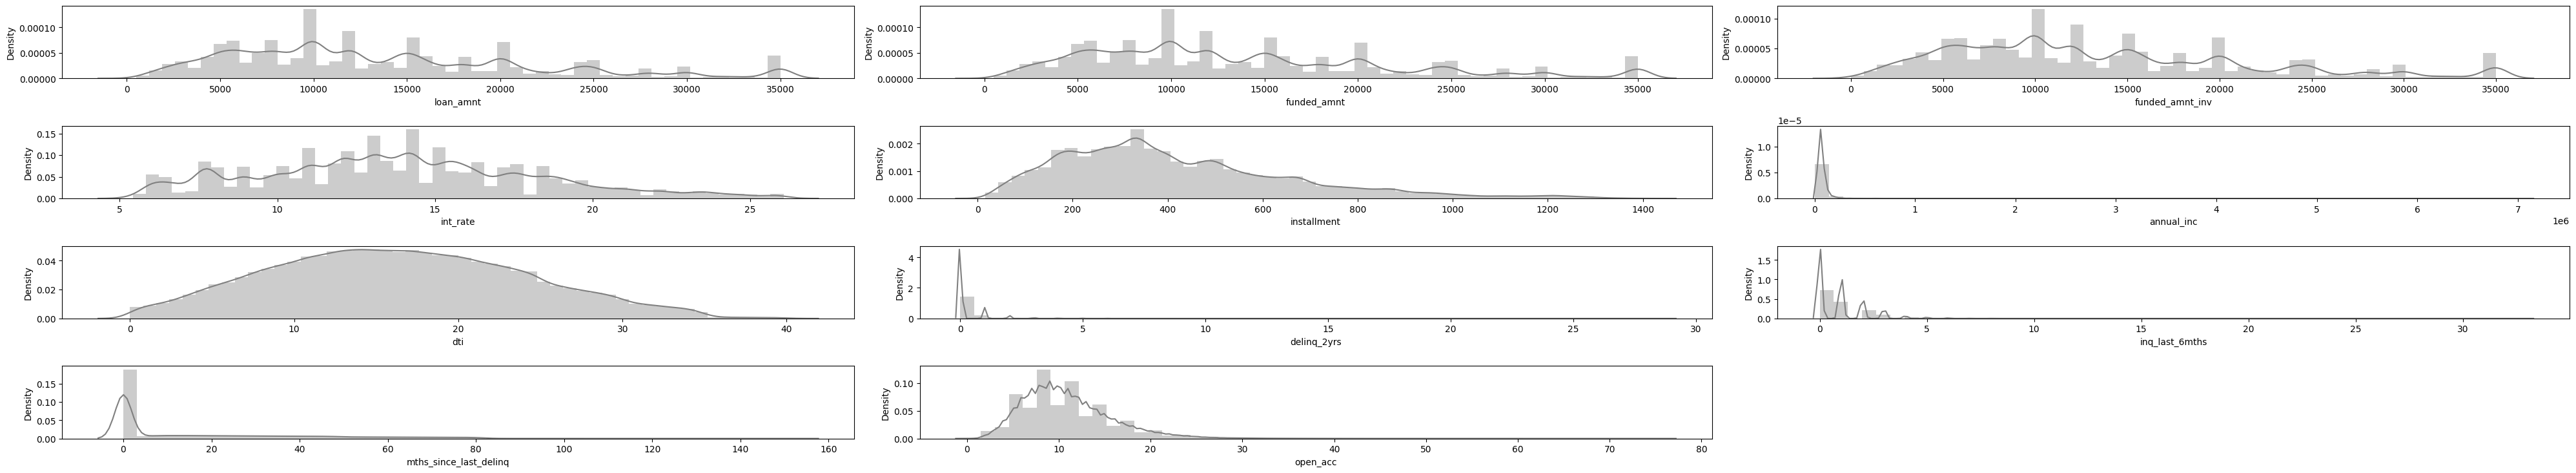

In [56]:
plt.figure(figsize=(40, 20))
for i in range(0, 11):
    plt.subplot(11, 3, i+1)
    sns.distplot(uni_dist.iloc[:,i], color='gray')
    plt.tight_layout()

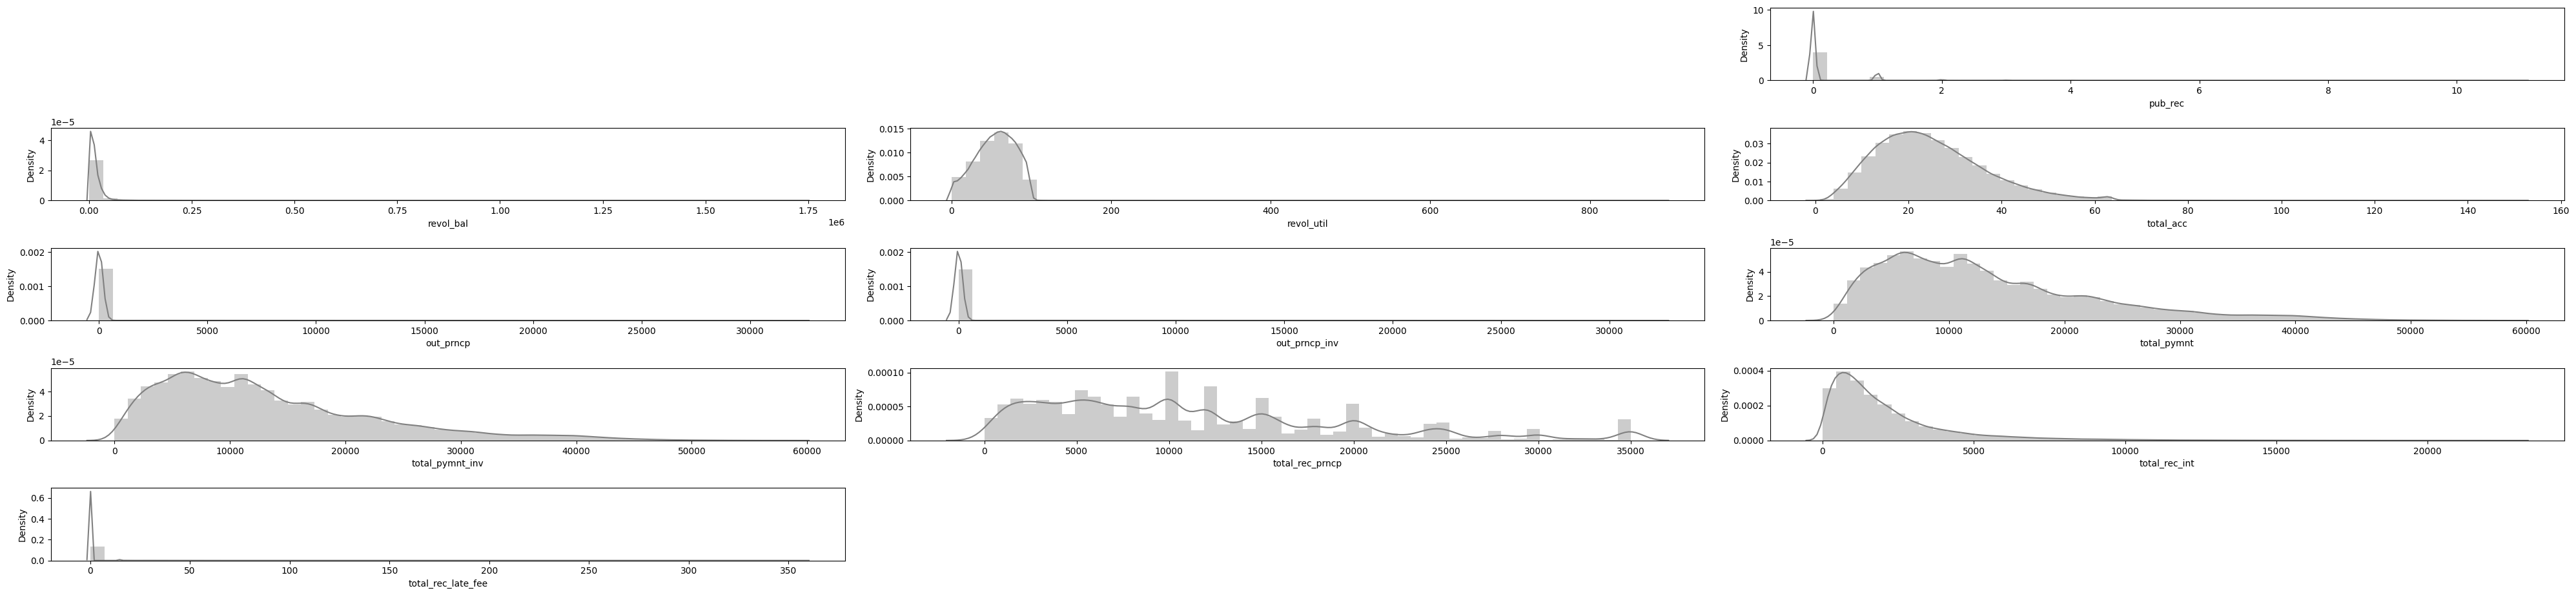

In [57]:
plt.figure(figsize=(40, 20))
for i in range(11, 22):
    plt.subplot(11, 3, i+1)
    sns.distplot(uni_dist.iloc[:,i], color='gray')
    plt.tight_layout()

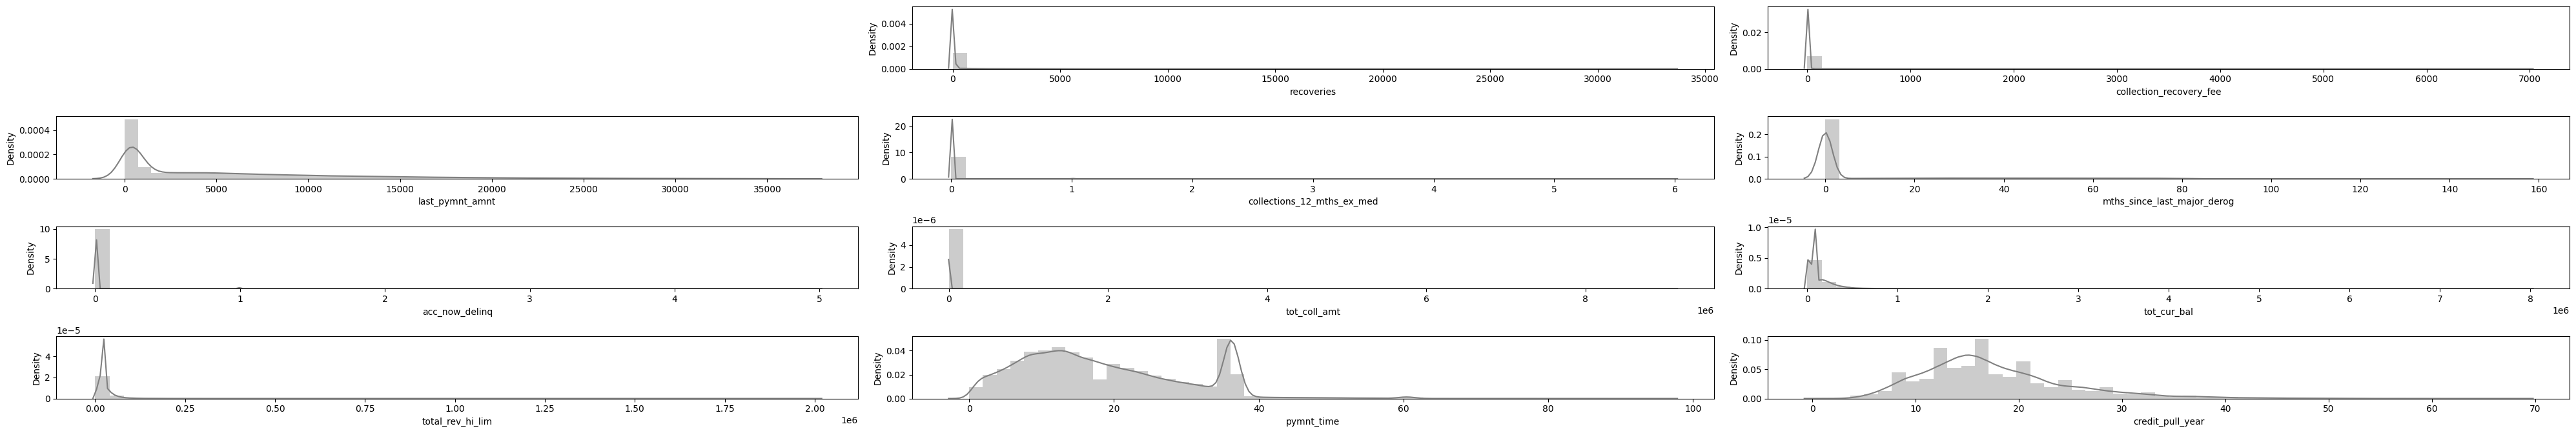

In [58]:
plt.figure(figsize=(40, 20))
for i in range(22, 33):
    plt.subplot(12, 3, i+1)
    sns.distplot(uni_dist.iloc[:,i], color='gray')
    plt.tight_layout()



*   Sebagian besar fiturnya skewed/bias
*   Fitur yang tidak skewed/bias: loan_amnt,funded_amnt,funded_amnt_inv,int_rate,dti



# **Analysing Box Plot**

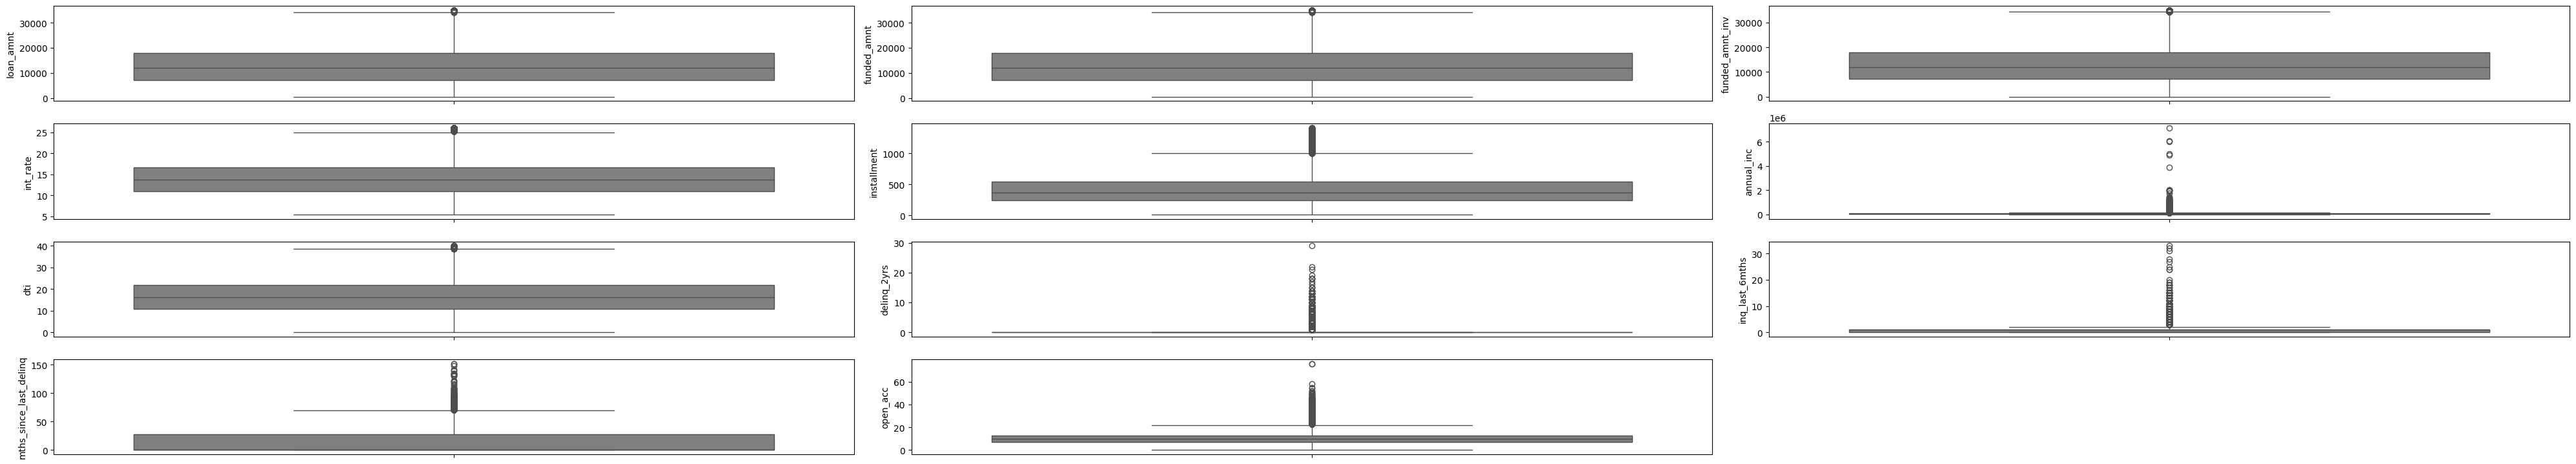

In [59]:
plt.figure(figsize=(40, 20))
for i in range(0, 11):
    plt.subplot(11, 3, i+1)
    sns.boxplot(uni_dist.iloc[:,i], color='gray',orient='v')
    plt.tight_layout()


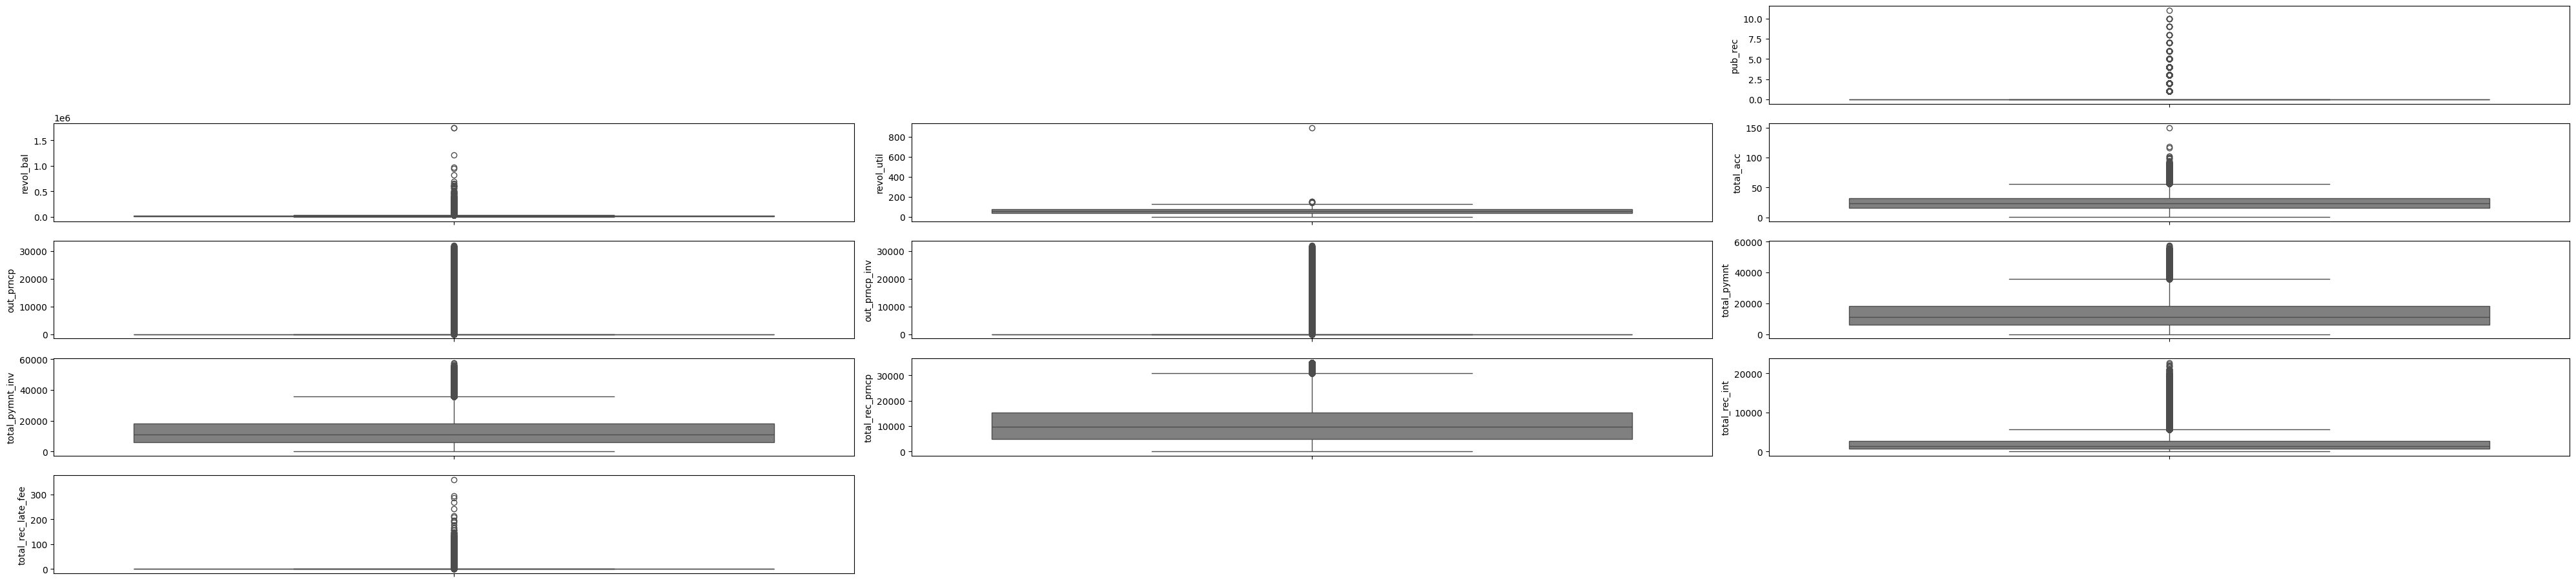

In [60]:
plt.figure(figsize=(40, 20))
for i in range(11, 22):
    plt.subplot(11, 3, i+1)
    sns.boxplot(uni_dist.iloc[:,i], color='gray',orient='v')
    plt.tight_layout()

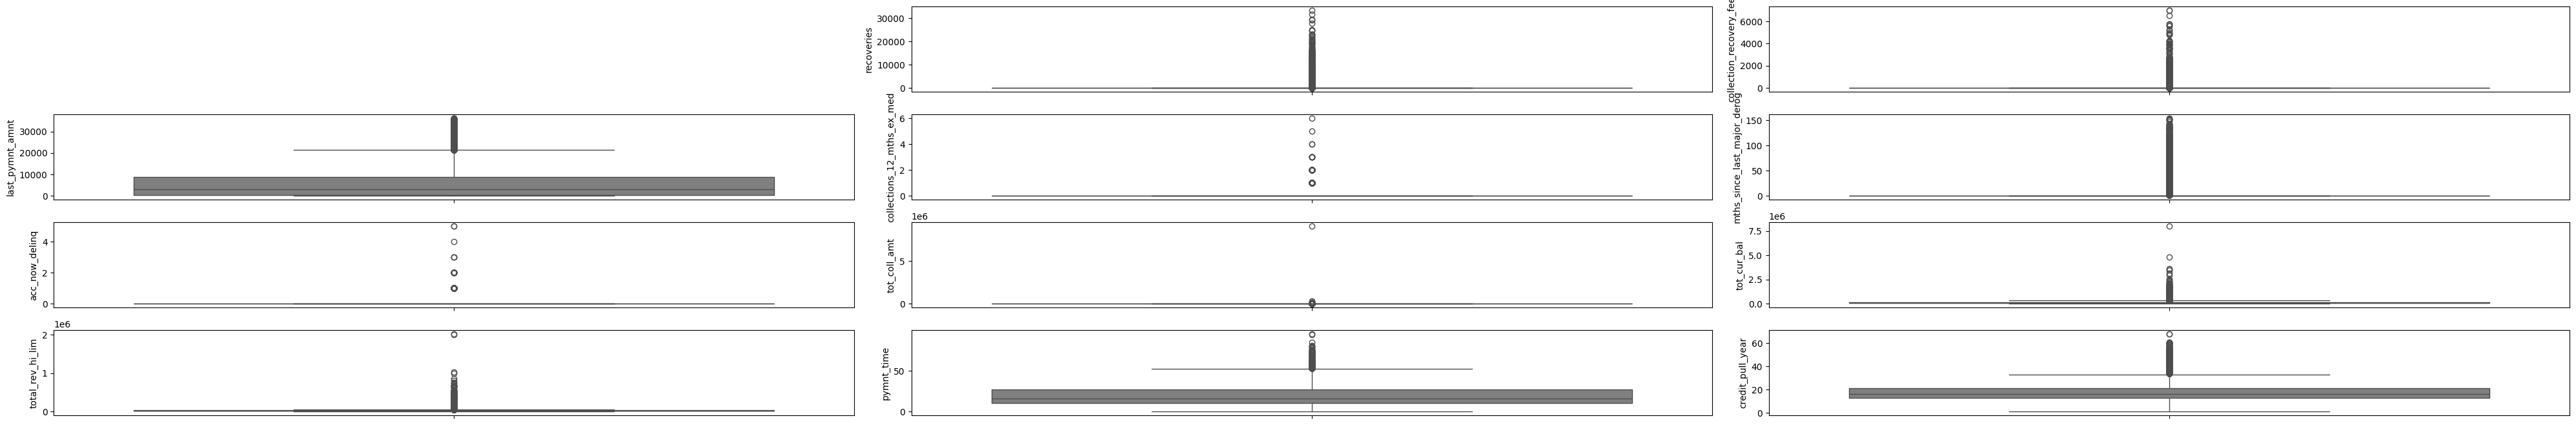

In [61]:
plt.figure(figsize=(40, 20))
for i in range(22, 33):
    plt.subplot(12, 3, i+1)
    sns.boxplot(uni_dist.iloc[:,i], color='gray',orient='v')
    plt.tight_layout()

*   Sebagian besar fitur memiliki outlier
*   Fitur tanpa outlier: loan_amnt,funded_amnt,funded_amnt_inv,int_rate

Penyimpangan outliers: installment, annual_inc open_acc, revol_bal, total_pymnt_inv, out_prncp, total_rec_late_fee, out_prncp_inv, total_rec_prncp, total_pymnt, total_acc, total_rec_int, last_pymnt_amnt,
total_rev_hi_lim, recoveries, total_coll_amt, pymnt_time, collection_recovery_fee, tot_cur_bal, credit_pull_year,




# **Correlation Analysis for Feature Selection**

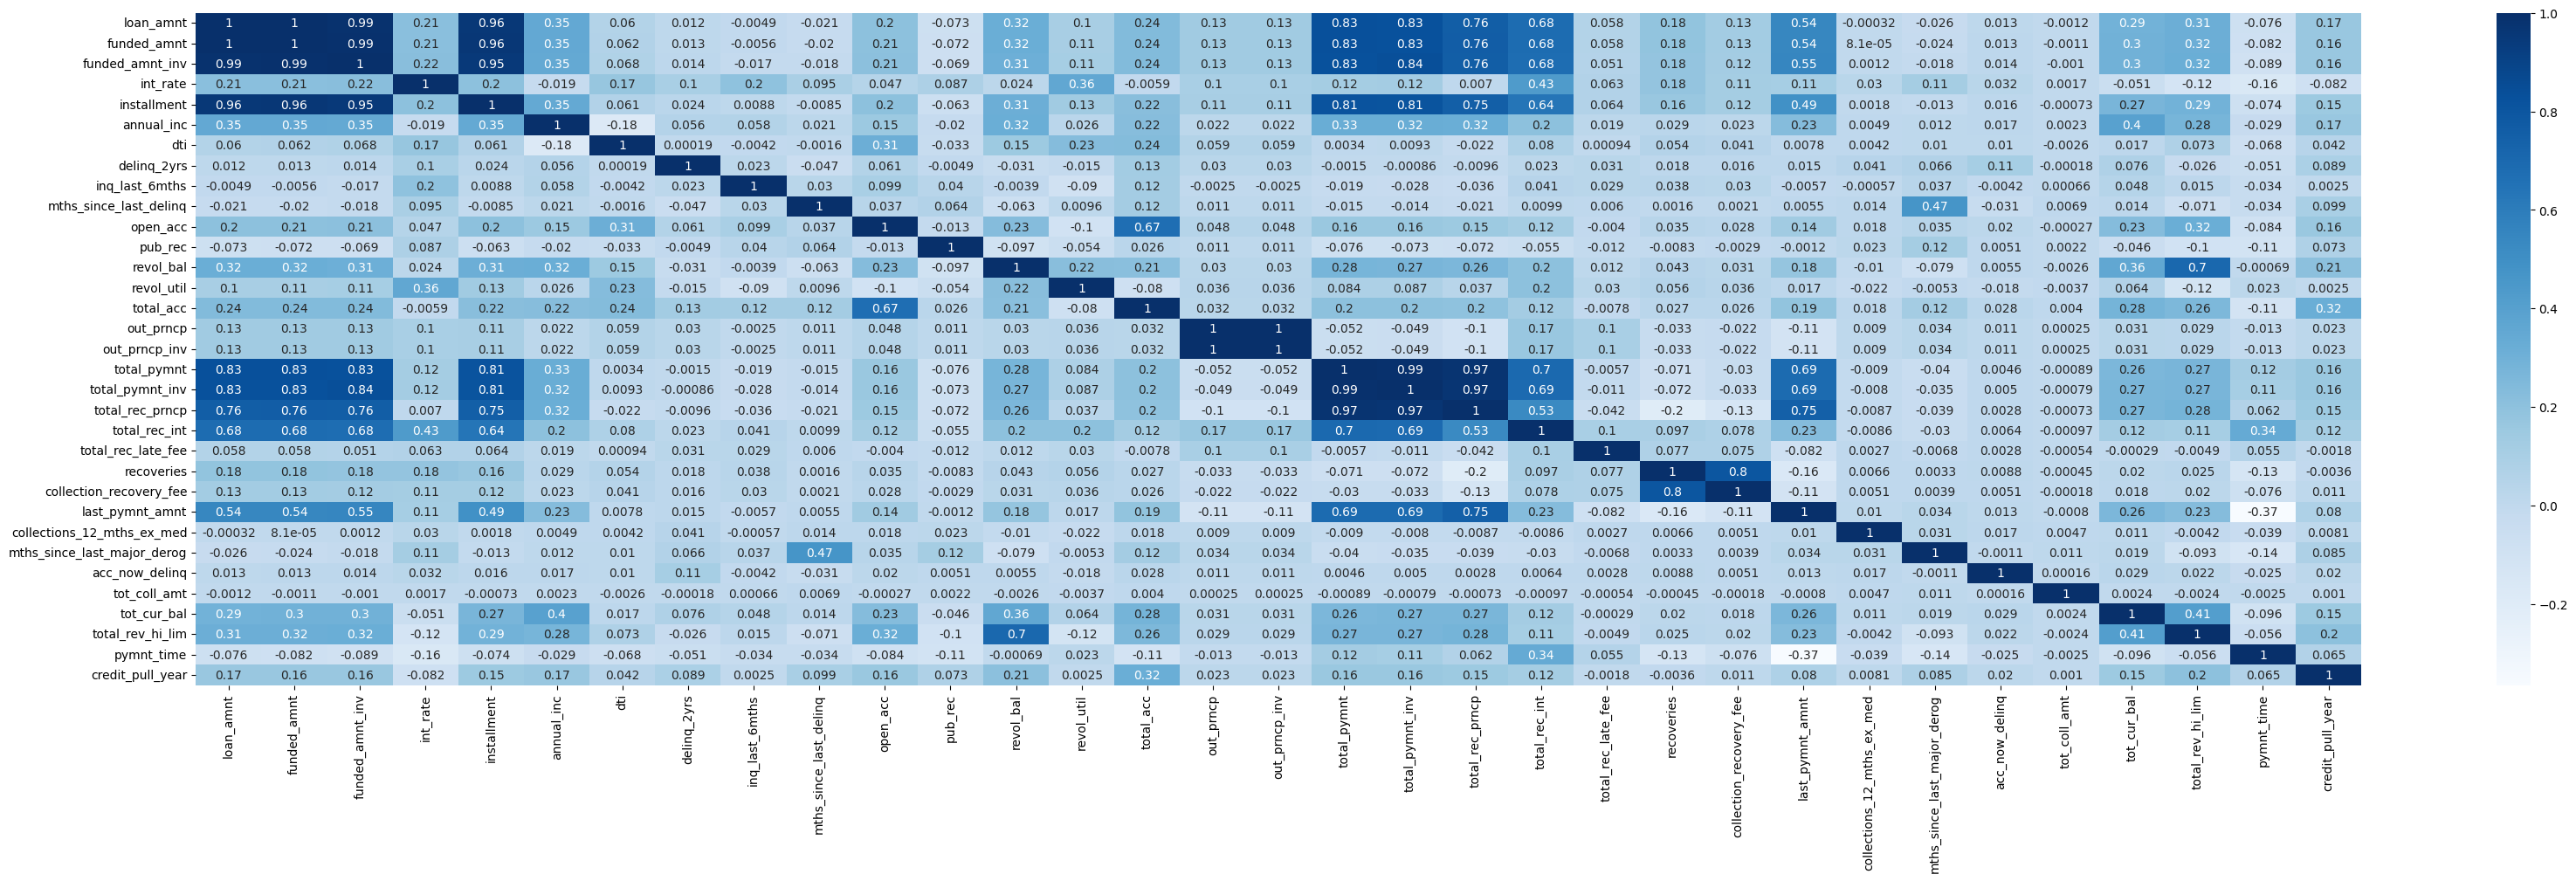

In [62]:
non_used = ['Unnamed: 0','id','member_id','policy_code','loan_status']
uni_dist = df_cred.select_dtypes(include=[np.float64,np.int64])
uni_dist = uni_dist[uni_dist.columns[~uni_dist.columns.isin(non_used)]]
fig = plt.figure(figsize = (40,10))
sns.heatmap(uni_dist.corr(),cmap='Blues', annot = True);

In [63]:
def top_correlation (df,n):
    corr_matrix = df.corr()
    correlation = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
    correlation = pd.DataFrame(correlation).reset_index()
    correlation.columns=["Variable_1","Variable_2","Correlation"]
    correlation = correlation.reindex(correlation.Correlation.abs().sort_values(ascending=False).index).reset_index().drop(["index"],axis=1)
    return correlation.head(n)
print("High Correlated Features (Corr > 0.5)")
top_correlation(uni_dist,39)


High Correlated Features (Corr > 0.5)


,Variable_1,Variable_2,Correlation
0,out_prncp,out_prncp_inv,0.999999
1,loan_amnt,funded_amnt,0.997286
2,total_pymnt,total_pymnt_inv,0.993913
3,funded_amnt,funded_amnt_inv,0.992104
4,loan_amnt,funded_amnt_inv,0.988784
5,total_pymnt,total_rec_prncp,0.973771
6,total_pymnt_inv,total_rec_prncp,0.968241
7,funded_amnt,installment,0.959611
8,loan_amnt,installment,0.955520
9,funded_amnt_inv,installment,0.951136


In [64]:
df_corr = top_correlation(uni_dist,41)
df_corr.to_excel('df_corr_3.xlsx', index=False)
!cp 'df_corr_3.xlsx' '/content/drive/MyDrive/IDX Partners'
print('Saving correlation data is done!')

Saving correlation data is done!


In [65]:
uni_dist.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
0,5000,5000,4975.0,10.65,162.87,24000.0,27.65,0.0,1.0,0.0,3.0,0.0,13648,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31
1,2500,2500,2500.0,15.27,59.83,30000.0,1.00,0.0,5.0,0.0,3.0,0.0,1687,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14
2,2400,2400,2400.0,15.96,84.33,12252.0,8.72,0.0,2.0,0.0,2.0,0.0,2956,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,0.0,0.0,0.0,81539.0,22800.0,30,15
3,10000,10000,10000.0,13.49,339.31,49200.0,20.00,0.0,1.0,35.0,10.0,0.0,5598,21.0,37.0,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,0.0,0.0,0.0,81539.0,22800.0,37,19
4,5000,5000,5000.0,7.90,156.46,36000.0,11.20,0.0,3.0,0.0,9.0,0.0,7963,28.3,12.0,0.0,0.0,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,161.03,0.0,0.0,0.0,0.0,81539.0,22800.0,37,11


*   emp_title, url,title, zip_code, earliest_cr_line memiliki lebih dari 500 unique values
*   last_credit_pull_d,last_pymnt_d,issue_d,addr_state memiliki setidaknya 50 unique values (below 500)
*   application_type hanya memiliki satu nilai unik






In [66]:
removed_unused = ['Unnamed: 0','id','member_id','policy_code','emp_title','url','title','zip_code','earliest_cr_line']
multicol = ['last_credit_pull_d','last_pymnt_d','issue_d','addr_state','application_type',
            'out_prncp_inv','funded_amnt','total_pymnt_inv','funded_amnt_inv','total_rec_prncp','out_prncp',
            'revol_bal','total_pymnt','recoveries','total_rec_int','total_acc','loan_amnt']
removed_all = removed_unused + multicol

In [67]:
df_cred_a = df_cred[df_cred.columns[~df_cred.columns.isin(removed_all)]].reset_index(drop=True)
df_cred_b = df_cred[df_cred.columns[~df_cred.columns.isin(removed_unused)]].reset_index(drop=True)

In [68]:
df_cred_a.head()

,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,initial_list_status,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,1,n,credit_card,27.65,0.0,1.0,0.0,3.0,0.0,83.7,f,0.00,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31
1,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,0,n,car,1.00,0.0,5.0,0.0,3.0,0.0,9.4,f,0.00,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14
2,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,1,n,small_business,8.72,0.0,2.0,0.0,2.0,0.0,98.5,f,0.00,0.00,649.91,0.0,0.0,0.0,0.0,81539.0,22800.0,30,15
3,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,1,n,other,20.00,0.0,1.0,35.0,10.0,0.0,21.0,f,16.97,0.00,357.48,0.0,0.0,0.0,0.0,81539.0,22800.0,37,19
4,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,1,n,wedding,11.20,0.0,3.0,0.0,9.0,0.0,28.3,f,0.00,0.00,161.03,0.0,0.0,0.0,0.0,81539.0,22800.0,37,11


In [69]:
df_cred_b.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,1,n,credit_card,AZ,27.65,0.0,1.0,0.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,2015-01-01,171.62,2016-01-01,0.0,0.0,INDIVIDUAL,0.0,0.0,81539.0,22800.0,37,31
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,0,n,car,GA,1.00,0.0,5.0,0.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,0.0,INDIVIDUAL,0.0,0.0,81539.0,22800.0,16,14
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,1,n,small_business,IL,8.72,0.0,2.0,0.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,2014-06-01,649.91,2016-01-01,0.0,0.0,INDIVIDUAL,0.0,0.0,81539.0,22800.0,30,15
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,1,n,other,CA,20.00,0.0,1.0,35.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,2015-01-01,357.48,2015-01-01,0.0,0.0,INDIVIDUAL,0.0,0.0,81539.0,22800.0,37,19
4,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,2011-12-01,1,n,wedding,AZ,11.20,0.0,3.0,0.0,9.0,0.0,7963,28.3,12.0,f,0.0,0.0,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,2015-01-01,161.03,2015-09-01,0.0,0.0,INDIVIDUAL,0.0,0.0,81539.0,22800.0,37,11


In [70]:
df_cred_a.to_csv('df_cred_a.csv', index=False)
!cp 'df_cred_a.csv' '/content/drive/MyDrive/IDX Partners'
print('Saving cleaned data is done!')

df_cred_b.to_csv('df_cred_b.csv', index=False)
!cp 'df_cred_b.csv' '/content/drive/MyDrive/IDX Partners'
print('Saving cleaned data is done!')

Saving cleaned data is done!
Saving cleaned data is done!


# **Categorical Encoding**

In [71]:
df_cred_a = pd.read_csv('/content/drive/MyDrive/IDX Partners/df_cred_a.csv')
df_cred_a.head(2)

,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,initial_list_status,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,1,n,credit_card,27.65,0.0,1.0,0.0,3.0,0.0,83.7,f,0.0,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31
1,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,0,n,car,1.00,0.0,5.0,0.0,3.0,0.0,9.4,f,0.0,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14


In [72]:
df_cred_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237695 entries, 0 to 237694
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   term                         237695 non-null  object 
 1   int_rate                     237695 non-null  float64
 2   installment                  237695 non-null  float64
 3   grade                        237695 non-null  object 
 4   sub_grade                    237695 non-null  object 
 5   emp_length                   237695 non-null  object 
 6   home_ownership               237695 non-null  object 
 7   annual_inc                   237695 non-null  float64
 8   verification_status          237695 non-null  object 
 9   loan_status                  237695 non-null  int64  
 10  pymnt_plan                   237695 non-null  object 
 11  purpose                      237695 non-null  object 
 12  dti                          237695 non-null  float64
 13 

In [73]:
df_cred_b = pd.read_csv('/content/drive/MyDrive/IDX Partners/df_cred_b.csv')
df_cred_b.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,1,n,credit_card,AZ,27.65,0.0,1.0,0.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,2015-01-01,171.62,2016-01-01,0.0,0.0,INDIVIDUAL,0.0,0.0,81539.0,22800.0,37,31
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,0,n,car,GA,1.00,0.0,5.0,0.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,0.0,INDIVIDUAL,0.0,0.0,81539.0,22800.0,16,14


In [74]:
df_cred_a["term"].unique()

array(['36 months', '60 months'], dtype=object)

In [75]:
def text_num(text):
  return [int(s) for s in text.split() if s.isdigit()][0]

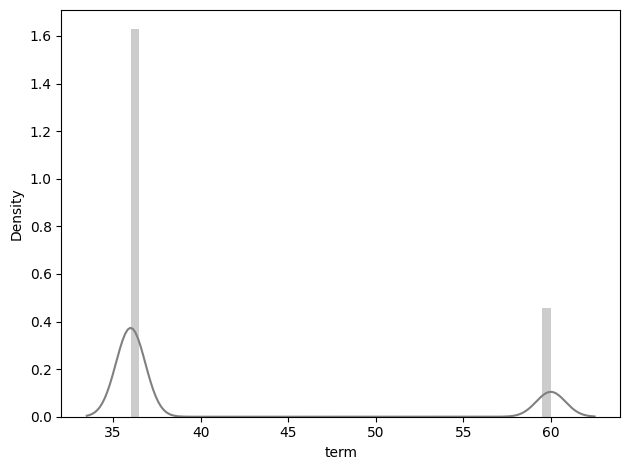

In [76]:
sns.distplot(df_cred_a["term"].apply(lambda x: text_num(x)), color='gray')
plt.tight_layout()
plt.show()

In [77]:
df_cred_a["term"] = df_cred_a["term"].apply(lambda x: text_num(x))
df_cred_a.head()

,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,initial_list_status,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,1,n,credit_card,27.65,0.0,1.0,0.0,3.0,0.0,83.7,f,0.00,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31
1,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,0,n,car,1.00,0.0,5.0,0.0,3.0,0.0,9.4,f,0.00,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14
2,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,1,n,small_business,8.72,0.0,2.0,0.0,2.0,0.0,98.5,f,0.00,0.00,649.91,0.0,0.0,0.0,0.0,81539.0,22800.0,30,15
3,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,1,n,other,20.00,0.0,1.0,35.0,10.0,0.0,21.0,f,16.97,0.00,357.48,0.0,0.0,0.0,0.0,81539.0,22800.0,37,19
4,36,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,1,n,wedding,11.20,0.0,3.0,0.0,9.0,0.0,28.3,f,0.00,0.00,161.03,0.0,0.0,0.0,0.0,81539.0,22800.0,37,11


In [78]:
df_cred_a["grade"].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [79]:
# Define a dictionary for encoding ordinal variable
target_dict = {'A':6,
               'B':5,
               'C':4,
               'D':3,
               'E':2,
               'F':1,
               'G':0}
# Create the mapped values in a new column
df_cred_a["grade"] = df_cred_a["grade"].map(target_dict)

In [80]:
# Review dataset
df_cred_a.head()

,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,initial_list_status,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
0,36,10.65,162.87,5,B2,10+ years,RENT,24000.0,Verified,1,n,credit_card,27.65,0.0,1.0,0.0,3.0,0.0,83.7,f,0.00,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31
1,60,15.27,59.83,4,C4,< 1 year,RENT,30000.0,Source Verified,0,n,car,1.00,0.0,5.0,0.0,3.0,0.0,9.4,f,0.00,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14
2,36,15.96,84.33,4,C5,10+ years,RENT,12252.0,Not Verified,1,n,small_business,8.72,0.0,2.0,0.0,2.0,0.0,98.5,f,0.00,0.00,649.91,0.0,0.0,0.0,0.0,81539.0,22800.0,30,15
3,36,13.49,339.31,4,C1,10+ years,RENT,49200.0,Source Verified,1,n,other,20.00,0.0,1.0,35.0,10.0,0.0,21.0,f,16.97,0.00,357.48,0.0,0.0,0.0,0.0,81539.0,22800.0,37,19
4,36,7.90,156.46,6,A4,3 years,RENT,36000.0,Source Verified,1,n,wedding,11.20,0.0,3.0,0.0,9.0,0.0,28.3,f,0.00,0.00,161.03,0.0,0.0,0.0,0.0,81539.0,22800.0,37,11


In [81]:
df_cred_a["sub_grade"].unique()

array(['B2', 'C4', 'C5', 'C1', 'A4', 'E1', 'F2', 'B5', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F1', 'E5', 'G4', 'E2', 'G2', 'G1', 'F5', 'F4',
       'G5', 'G3'], dtype=object)

In [82]:
def f_A(row):
    if row == 'A1':
        val = 1
    elif row == 'A2':
        val = 2
    elif row == 'A3':
        val = 3
    elif row == 'A4':
        val = 4
    elif row == 'A5':
        val = 5
    else:
        val = 0
    return val

def f_B(row):
    if row == 'B1':
        val = 1
    elif row == 'B2':
        val = 2
    elif row == 'B3':
        val = 3
    elif row == 'B4':
        val = 4
    elif row == 'B5':
        val = 5
    else:
        val = 0
    return val

def f_C(row):
    if row == 'C1':
        val = 1
    elif row == 'C2':
        val = 2
    elif row == 'C3':
        val = 3
    elif row == 'C4':
        val = 4
    elif row == 'C5':
        val = 5
    else:
        val = 0
    return val

def f_D(row):
    if row == 'D1':
        val = 1
    elif row == 'D2':
        val = 2
    elif row == 'D3':
        val = 3
    elif row == 'D4':
        val = 4
    elif row == 'D5':
        val = 5
    else:
        val = 0
    return val

def f_E(row):
    if row == 'E1':
        val = 1
    elif row == 'E2':
        val = 2
    elif row == 'E3':
        val = 3
    elif row == 'E4':
        val = 4
    elif row == 'E5':
        val = 5
    else:
        val = 0
    return val

def f_F(row):
    if row == 'F1':
        val = 1
    elif row == 'F2':
        val = 2
    elif row == 'F3':
        val = 3
    elif row == 'F4':
        val = 4
    elif row == 'F5':
        val = 5
    else:
        val = 0
    return val

def f_G(row):
    if row == 'G1':
        val = 1
    elif row == 'G2':
        val = 2
    elif row == 'G3':
        val = 3
    elif row == 'G4':
        val = 4
    elif row == 'G5':
        val = 5
    else:
        val = 0
    return val

In [83]:
df_cred_a['SubGrade_A'] = df_cred_a["sub_grade"].apply(f_A)
df_cred_a['SubGrade_B'] = df_cred_a["sub_grade"].apply(f_B)
df_cred_a['SubGrade_C'] = df_cred_a["sub_grade"].apply(f_C)
df_cred_a['SubGrade_D'] = df_cred_a["sub_grade"].apply(f_D)
df_cred_a['SubGrade_E'] = df_cred_a["sub_grade"].apply(f_E)
df_cred_a['SubGrade_F'] = df_cred_a["sub_grade"].apply(f_F)
df_cred_a['SubGrade_G'] = df_cred_a["sub_grade"].apply(f_G)
df_cred_a = df_cred_a.drop(axis=1, columns="sub_grade")

In [84]:
df_cred_a.head()

,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,initial_list_status,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year,SubGrade_A,SubGrade_B,SubGrade_C,SubGrade_D,SubGrade_E,SubGrade_F,SubGrade_G
0,36,10.65,162.87,5,10+ years,RENT,24000.0,Verified,1,n,credit_card,27.65,0.0,1.0,0.0,3.0,0.0,83.7,f,0.00,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31,0,2,0,0,0,0,0
1,60,15.27,59.83,4,< 1 year,RENT,30000.0,Source Verified,0,n,car,1.00,0.0,5.0,0.0,3.0,0.0,9.4,f,0.00,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14,0,0,4,0,0,0,0
2,36,15.96,84.33,4,10+ years,RENT,12252.0,Not Verified,1,n,small_business,8.72,0.0,2.0,0.0,2.0,0.0,98.5,f,0.00,0.00,649.91,0.0,0.0,0.0,0.0,81539.0,22800.0,30,15,0,0,5,0,0,0,0
3,36,13.49,339.31,4,10+ years,RENT,49200.0,Source Verified,1,n,other,20.00,0.0,1.0,35.0,10.0,0.0,21.0,f,16.97,0.00,357.48,0.0,0.0,0.0,0.0,81539.0,22800.0,37,19,0,0,1,0,0,0,0
4,36,7.90,156.46,6,3 years,RENT,36000.0,Source Verified,1,n,wedding,11.20,0.0,3.0,0.0,9.0,0.0,28.3,f,0.00,0.00,161.03,0.0,0.0,0.0,0.0,81539.0,22800.0,37,11,4,0,0,0,0,0,0


In [85]:
df_cred_a["emp_length"].unique()

array(['10+ years', '< 1 year', '3 years', '9 years', '4 years',
       '5 years', '1 year', '6 years', '2 years', '7 years', '8 years'],
      dtype=object)

In [86]:
# Define a dictionary for encoding ordinal variable
target_dict = {'< 1 year':0,
               '1 year':1,
               '2 years':2,
               '3 years':3,
               '4 years':4,
               '5 years':5,
               '6 years':6,
               '7 years':7,
               '8 years':8,
               '9 years':9,
               '10+ years':10}
# Create the mapped values in a new column
df_cred_a["emp_length"] = df_cred_a["emp_length"].map(target_dict)

In [87]:
df_cred_a.head()

,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,initial_list_status,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year,SubGrade_A,SubGrade_B,SubGrade_C,SubGrade_D,SubGrade_E,SubGrade_F,SubGrade_G
0,36,10.65,162.87,5,10,RENT,24000.0,Verified,1,n,credit_card,27.65,0.0,1.0,0.0,3.0,0.0,83.7,f,0.00,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31,0,2,0,0,0,0,0
1,60,15.27,59.83,4,0,RENT,30000.0,Source Verified,0,n,car,1.00,0.0,5.0,0.0,3.0,0.0,9.4,f,0.00,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14,0,0,4,0,0,0,0
2,36,15.96,84.33,4,10,RENT,12252.0,Not Verified,1,n,small_business,8.72,0.0,2.0,0.0,2.0,0.0,98.5,f,0.00,0.00,649.91,0.0,0.0,0.0,0.0,81539.0,22800.0,30,15,0,0,5,0,0,0,0
3,36,13.49,339.31,4,10,RENT,49200.0,Source Verified,1,n,other,20.00,0.0,1.0,35.0,10.0,0.0,21.0,f,16.97,0.00,357.48,0.0,0.0,0.0,0.0,81539.0,22800.0,37,19,0,0,1,0,0,0,0
4,36,7.90,156.46,6,3,RENT,36000.0,Source Verified,1,n,wedding,11.20,0.0,3.0,0.0,9.0,0.0,28.3,f,0.00,0.00,161.03,0.0,0.0,0.0,0.0,81539.0,22800.0,37,11,4,0,0,0,0,0,0


In [88]:
df_cred_a["home_ownership"].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [89]:
df_cred_a["home_ownership"].value_counts()

,count
home_ownership,
MORTGAGE,116769
RENT,100703
OWN,19995
OTHER,179
NONE,48
ANY,1


In [90]:
# Define a dictionary for aggregating variable
target_dict = {'MORTGAGE':'MORTGAGE',
               'RENT':'RENT',
               'OWN':'OWN',
               'OTHER':'OTHER',
               'ANY':'OTHER',
               'NONE':'OTHER'}
# Create the mapped values in a new column
df_cred_a["home_ownership"] = df_cred_a["home_ownership"].map(target_dict)

In [91]:
df_cred_a.head()

,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,initial_list_status,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year,SubGrade_A,SubGrade_B,SubGrade_C,SubGrade_D,SubGrade_E,SubGrade_F,SubGrade_G
0,36,10.65,162.87,5,10,RENT,24000.0,Verified,1,n,credit_card,27.65,0.0,1.0,0.0,3.0,0.0,83.7,f,0.00,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31,0,2,0,0,0,0,0
1,60,15.27,59.83,4,0,RENT,30000.0,Source Verified,0,n,car,1.00,0.0,5.0,0.0,3.0,0.0,9.4,f,0.00,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14,0,0,4,0,0,0,0
2,36,15.96,84.33,4,10,RENT,12252.0,Not Verified,1,n,small_business,8.72,0.0,2.0,0.0,2.0,0.0,98.5,f,0.00,0.00,649.91,0.0,0.0,0.0,0.0,81539.0,22800.0,30,15,0,0,5,0,0,0,0
3,36,13.49,339.31,4,10,RENT,49200.0,Source Verified,1,n,other,20.00,0.0,1.0,35.0,10.0,0.0,21.0,f,16.97,0.00,357.48,0.0,0.0,0.0,0.0,81539.0,22800.0,37,19,0,0,1,0,0,0,0
4,36,7.90,156.46,6,3,RENT,36000.0,Source Verified,1,n,wedding,11.20,0.0,3.0,0.0,9.0,0.0,28.3,f,0.00,0.00,161.03,0.0,0.0,0.0,0.0,81539.0,22800.0,37,11,4,0,0,0,0,0,0


In [92]:
encoder = OneHotEncoder(sparse_output=False)
df_cred_a_encoded = pd.DataFrame(encoder.fit_transform(df_cred_a[["home_ownership"]]))
df_cred_a_encoded.columns = encoder.get_feature_names_out(["home_ownership"])  # juga gunakan .get_feature_names_out
df_cred_a = pd.concat([df_cred_a, df_cred_a_encoded], axis=1)
df_cred_a.drop(["home_ownership"], axis=1, inplace=True)
df_cred_a.head()

,term,int_rate,installment,grade,emp_length,annual_inc,verification_status,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,initial_list_status,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year,SubGrade_A,SubGrade_B,SubGrade_C,SubGrade_D,SubGrade_E,SubGrade_F,SubGrade_G,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,36,10.65,162.87,5,10,24000.0,Verified,1,n,credit_card,27.65,0.0,1.0,0.0,3.0,0.0,83.7,f,0.00,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31,0,2,0,0,0,0,0,0.0,0.0,0.0,1.0
1,60,15.27,59.83,4,0,30000.0,Source Verified,0,n,car,1.00,0.0,5.0,0.0,3.0,0.0,9.4,f,0.00,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14,0,0,4,0,0,0,0,0.0,0.0,0.0,1.0
2,36,15.96,84.33,4,10,12252.0,Not Verified,1,n,small_business,8.72,0.0,2.0,0.0,2.0,0.0,98.5,f,0.00,0.00,649.91,0.0,0.0,0.0,0.0,81539.0,22800.0,30,15,0,0,5,0,0,0,0,0.0,0.0,0.0,1.0
3,36,13.49,339.31,4,10,49200.0,Source Verified,1,n,other,20.00,0.0,1.0,35.0,10.0,0.0,21.0,f,16.97,0.00,357.48,0.0,0.0,0.0,0.0,81539.0,22800.0,37,19,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0
4,36,7.90,156.46,6,3,36000.0,Source Verified,1,n,wedding,11.20,0.0,3.0,0.0,9.0,0.0,28.3,f,0.00,0.00,161.03,0.0,0.0,0.0,0.0,81539.0,22800.0,37,11,4,0,0,0,0,0,0,0.0,0.0,0.0,1.0


In [93]:
df_cred_a["verification_status"].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [94]:
df_cred_a["verification_status"].value_counts()

,count
verification_status,
Verified,88337
Not Verified,82760
Source Verified,66598


In [95]:
encoder = OneHotEncoder(sparse_output=False)
df_cred_a_encoded = pd.DataFrame(
    encoder.fit_transform(df_cred_a[["verification_status"]]),
    columns=encoder.get_feature_names_out(["verification_status"])
)
df_cred_a = pd.concat([df_cred_a, df_cred_a_encoded], axis=1)
df_cred_a.drop(["verification_status"], axis=1, inplace=True)

df_cred_a.head()

,term,int_rate,installment,grade,emp_length,annual_inc,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,initial_list_status,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year,SubGrade_A,SubGrade_B,SubGrade_C,SubGrade_D,SubGrade_E,SubGrade_F,SubGrade_G,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,36,10.65,162.87,5,10,24000.0,1,n,credit_card,27.65,0.0,1.0,0.0,3.0,0.0,83.7,f,0.00,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31,0,2,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,60,15.27,59.83,4,0,30000.0,0,n,car,1.00,0.0,5.0,0.0,3.0,0.0,9.4,f,0.00,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14,0,0,4,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,36,15.96,84.33,4,10,12252.0,1,n,small_business,8.72,0.0,2.0,0.0,2.0,0.0,98.5,f,0.00,0.00,649.91,0.0,0.0,0.0,0.0,81539.0,22800.0,30,15,0,0,5,0,0,0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,36,13.49,339.31,4,10,49200.0,1,n,other,20.00,0.0,1.0,35.0,10.0,0.0,21.0,f,16.97,0.00,357.48,0.0,0.0,0.0,0.0,81539.0,22800.0,37,19,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,36,7.90,156.46,6,3,36000.0,1,n,wedding,11.20,0.0,3.0,0.0,9.0,0.0,28.3,f,0.00,0.00,161.03,0.0,0.0,0.0,0.0,81539.0,22800.0,37,11,4,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [96]:
df_cred_a['pymnt_plan'].unique()

array(['n', 'y'], dtype=object)

In [97]:
# Define a dictionary for encoding ordinal variable
target_dict = {'n':0,
               'y':1}
# Create the mapped values in a new column
df_cred_a["pymnt_plan"] = df_cred_a["pymnt_plan"].map(target_dict)

In [98]:
df_cred_a.head()

,term,int_rate,installment,grade,emp_length,annual_inc,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,initial_list_status,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year,SubGrade_A,SubGrade_B,SubGrade_C,SubGrade_D,SubGrade_E,SubGrade_F,SubGrade_G,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,36,10.65,162.87,5,10,24000.0,1,0,credit_card,27.65,0.0,1.0,0.0,3.0,0.0,83.7,f,0.00,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31,0,2,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,60,15.27,59.83,4,0,30000.0,0,0,car,1.00,0.0,5.0,0.0,3.0,0.0,9.4,f,0.00,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14,0,0,4,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,36,15.96,84.33,4,10,12252.0,1,0,small_business,8.72,0.0,2.0,0.0,2.0,0.0,98.5,f,0.00,0.00,649.91,0.0,0.0,0.0,0.0,81539.0,22800.0,30,15,0,0,5,0,0,0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,36,13.49,339.31,4,10,49200.0,1,0,other,20.00,0.0,1.0,35.0,10.0,0.0,21.0,f,16.97,0.00,357.48,0.0,0.0,0.0,0.0,81539.0,22800.0,37,19,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,36,7.90,156.46,6,3,36000.0,1,0,wedding,11.20,0.0,3.0,0.0,9.0,0.0,28.3,f,0.00,0.00,161.03,0.0,0.0,0.0,0.0,81539.0,22800.0,37,11,4,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [99]:
df_cred_a["loan_status"].unique()

array([1, 0])

In [100]:
df_cred_a["purpose"].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [101]:
df_cred_a["purpose"].value_counts()

,count
purpose,
debt_consolidation,138318
credit_card,47421
home_improvement,13824
other,13635
major_purchase,5951
small_business,4766
car,3498
medical,2706
wedding,2017


In [102]:
# Define a dictionary for aggregating variable
target_dict = {'debt_consolidation':'debt_consolidation',
               'credit_card':'credit_card',
               'home_improvement':'private_use',
               'other':'other',
               'major_purchase':'major_purchase',
               'small_business':'small_business',
               'car':'private_use',
               'medical':'private_use',
               'wedding':'private_use',
               'moving':'private_use',
               'house':'private_use',
               'vacation':'private_use',
               'educational':'private_use',
               'renewable_energy':'other'}
# Create the mapped values in a new column
df_cred_a["purpose"] = df_cred_a["purpose"].map(target_dict)

In [103]:
df_cred_a["purpose"].value_counts()

,count
purpose,
debt_consolidation,138318
credit_card,47421
private_use,27348
other,13891
major_purchase,5951
small_business,4766


In [104]:
encoder = OneHotEncoder(sparse_output=False)
df_cred_a_encoded = pd.DataFrame(
    encoder.fit_transform(df_cred_a[["purpose"]]),
    columns=encoder.get_feature_names_out(["purpose"])
)
df_cred_a = pd.concat([df_cred_a, df_cred_a_encoded], axis=1)
df_cred_a.drop(["purpose"], axis=1, inplace=True)
df_cred_a.head()

,term,int_rate,installment,grade,emp_length,annual_inc,loan_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,initial_list_status,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year,SubGrade_A,SubGrade_B,SubGrade_C,SubGrade_D,SubGrade_E,SubGrade_F,SubGrade_G,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_major_purchase,purpose_other,purpose_private_use,purpose_small_business
0,36,10.65,162.87,5,10,24000.0,1,0,27.65,0.0,1.0,0.0,3.0,0.0,83.7,f,0.00,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31,0,2,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,60,15.27,59.83,4,0,30000.0,0,0,1.00,0.0,5.0,0.0,3.0,0.0,9.4,f,0.00,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14,0,0,4,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,36,15.96,84.33,4,10,12252.0,1,0,8.72,0.0,2.0,0.0,2.0,0.0,98.5,f,0.00,0.00,649.91,0.0,0.0,0.0,0.0,81539.0,22800.0,30,15,0,0,5,0,0,0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,36,13.49,339.31,4,10,49200.0,1,0,20.00,0.0,1.0,35.0,10.0,0.0,21.0,f,16.97,0.00,357.48,0.0,0.0,0.0,0.0,81539.0,22800.0,37,19,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,36,7.90,156.46,6,3,36000.0,1,0,11.20,0.0,3.0,0.0,9.0,0.0,28.3,f,0.00,0.00,161.03,0.0,0.0,0.0,0.0,81539.0,22800.0,37,11,4,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [105]:
df_cred_a["initial_list_status"].unique()

array(['f', 'w'], dtype=object)

In [106]:
encoder = OneHotEncoder(sparse_output=False)
df_cred_a_encoded = pd.DataFrame(
    encoder.fit_transform(df_cred_a[["initial_list_status"]]),
    columns=encoder.get_feature_names_out(["initial_list_status"])
)
df_cred_a = pd.concat([df_cred_a, df_cred_a_encoded], axis=1)
df_cred_a.drop(["initial_list_status"], axis=1, inplace=True)

df_cred_a.head()

,term,int_rate,installment,grade,emp_length,annual_inc,loan_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year,SubGrade_A,SubGrade_B,SubGrade_C,SubGrade_D,SubGrade_E,SubGrade_F,SubGrade_G,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_major_purchase,purpose_other,purpose_private_use,purpose_small_business,initial_list_status_f,initial_list_status_w
0,36,10.65,162.87,5,10,24000.0,1,0,27.65,0.0,1.0,0.0,3.0,0.0,83.7,0.00,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31,0,2,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,60,15.27,59.83,4,0,30000.0,0,0,1.00,0.0,5.0,0.0,3.0,0.0,9.4,0.00,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14,0,0,4,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,36,15.96,84.33,4,10,12252.0,1,0,8.72,0.0,2.0,0.0,2.0,0.0,98.5,0.00,0.00,649.91,0.0,0.0,0.0,0.0,81539.0,22800.0,30,15,0,0,5,0,0,0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,36,13.49,339.31,4,10,49200.0,1,0,20.00,0.0,1.0,35.0,10.0,0.0,21.0,16.97,0.00,357.48,0.0,0.0,0.0,0.0,81539.0,22800.0,37,19,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,36,7.90,156.46,6,3,36000.0,1,0,11.20,0.0,3.0,0.0,9.0,0.0,28.3,0.00,0.00,161.03,0.0,0.0,0.0,0.0,81539.0,22800.0,37,11,4,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [107]:
df_cred_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237695 entries, 0 to 237694
Data columns (total 48 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   term                                 237695 non-null  int64  
 1   int_rate                             237695 non-null  float64
 2   installment                          237695 non-null  float64
 3   grade                                237695 non-null  int64  
 4   emp_length                           237695 non-null  int64  
 5   annual_inc                           237695 non-null  float64
 6   loan_status                          237695 non-null  int64  
 7   pymnt_plan                           237695 non-null  int64  
 8   dti                                  237695 non-null  float64
 9   delinq_2yrs                          237695 non-null  float64
 10  inq_last_6mths                       237695 non-null  float64
 11  mths_since_la

In [108]:
df_cred_a.to_csv('df_cred_a_prep1.csv', index=False)
!cp 'df_cred_a_prep1.csv' '/content/drive/MyDrive/IDX Partners'
print('Saving data is done!')


Saving data is done!


#** Handling Outliers**

In [109]:
df_cred_a = pd.read_csv('/content/drive/MyDrive/IDX Partners/df_cred_a_prep1.csv')
df_cred_a.head(2)

,term,int_rate,installment,grade,emp_length,annual_inc,loan_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year,SubGrade_A,SubGrade_B,SubGrade_C,SubGrade_D,SubGrade_E,SubGrade_F,SubGrade_G,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_major_purchase,purpose_other,purpose_private_use,purpose_small_business,initial_list_status_f,initial_list_status_w
0,36,10.65,162.87,5,10,24000.0,1,0,27.65,0.0,1.0,0.0,3.0,0.0,83.7,0.0,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31,0,2,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,60,15.27,59.83,4,0,30000.0,0,0,1.00,0.0,5.0,0.0,3.0,0.0,9.4,0.0,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14,0,0,4,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [110]:
df_cred_a['delinq_2yrs'].unique()

array([ 0.,  2.,  3.,  1.,  4.,  6.,  5.,  8.,  7.,  9., 11., 13., 15.,
       10., 17., 18., 12., 29., 14., 21., 22., 16., 19.])

In [111]:
df_cred_a['inq_last_6mths'].unique()

array([ 1.,  5.,  2.,  3.,  0.,  4.,  6.,  7.,  8.,  9., 10., 11., 12.,
       15., 14., 33., 17., 32., 24., 13., 18., 16., 31., 28., 25., 27.,
       20., 19.])

In [112]:
df_cred_a['open_acc'].unique()

array([ 3.,  2., 10.,  9.,  4., 11., 14., 12., 20.,  8.,  7.,  6., 15.,
       17.,  5., 13., 16., 30., 21., 18., 19., 27., 23., 34., 25., 22.,
       24., 26., 32., 29., 28., 33., 31., 39., 35., 36., 38., 44., 41.,
       42.,  1., 46., 37., 47., 40., 49., 45., 43.,  0., 48., 50., 52.,
       76., 55., 58., 54., 51.])

In [113]:
df_cred_a['mths_since_last_major_derog'].unique()

array([  0.,  53.,  69.,  71.,  59.,  62.,  39.,  70.,  11.,  49.,  34.,
        74.,  60.,  45.,  51.,  48.,  10.,  27.,  22.,  57.,  56.,  61.,
        35.,  23.,  58.,  25.,  46.,  63.,  33.,  47.,  28.,  21.,  41.,
        50.,  52.,  80.,  68.,  65.,  30.,  26.,  75.,  16.,  32.,  73.,
        14.,   5.,  67.,  13.,  29.,  19.,  40.,  64.,  44.,  38.,  54.,
         4.,   9.,  24.,  42.,  94.,  37.,  66.,  79.,  36.,   8., 110.,
        17.,  31.,   1.,  76.,  81.,  84.,  18.,  20.,  43.,   7.,  78.,
        55.,  15.,   2.,  72.,  77.,   3.,  82., 100.,  12., 111., 102.,
         6.,  93., 135., 152.,  92.,  88.,  83.,  87., 122.,  86.,  91.,
       134.,  89.,  99.,  96., 119., 101., 109.,  85., 113., 120., 139.,
       106., 131.,  95.,  90., 141., 115., 116., 148., 104., 105., 137.,
        98., 114., 128., 133., 154., 121., 107., 151., 103., 118., 108.,
       142.,  97., 125., 132., 112., 123., 126., 136., 127., 130., 140.,
       117., 124., 150.])

In [114]:
len(df_cred_a['mths_since_last_major_derog'].unique())

146

In [115]:
df_cred_a['pub_rec'].unique() # this is not NUMERICAL FEATURE, because it HAS RANGE

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  9.,  8.,  7., 10., 11.])

In [116]:
df_cred_a['collections_12_mths_ex_med'].unique() # this is not NUMERICAL FEATURE, because it HAS RANGE

array([0., 1., 2., 4., 3., 6., 5.])

In [117]:
df_cred_a['acc_now_delinq'].unique() # this is not NUMERICAL FEATURE, because it HAS RANGE

array([0., 1., 2., 3., 5., 4.])

In [118]:
def subset_by_iqr(df, column):
    """Remove outliers from a dataframe by column, including optional
       whiskers, removing rows for which the column value are
       less than Q1-1.5IQR or greater than Q3+1.5IQR.
    Args:
        df (`:obj:pd.DataFrame`): A pandas dataframe to subset
        column (str): Name of the column to calculate the subset from.
        whisker_width (float): Optional, loosen the IQR filter by a
                               factor of `whisker_width` * IQR.
    Returns:
        (`:obj:pd.DataFrame`): Filtered dataframe
    """
    whisker_width=1.5
    # Calculate Q1, Q2 and IQR
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    # Apply filter with respect to IQR, including optional whiskers
    filter = (df[column] >= q1 - whisker_width*iqr) & (df[column] <= q3 + whisker_width*iqr)
    return df.loc[filter].reset_index(drop=True)

In [119]:
df_cred_a.head()

,term,int_rate,installment,grade,emp_length,annual_inc,loan_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year,SubGrade_A,SubGrade_B,SubGrade_C,SubGrade_D,SubGrade_E,SubGrade_F,SubGrade_G,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_major_purchase,purpose_other,purpose_private_use,purpose_small_business,initial_list_status_f,initial_list_status_w
0,36,10.65,162.87,5,10,24000.0,1,0,27.65,0.0,1.0,0.0,3.0,0.0,83.7,0.00,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31,0,2,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,60,15.27,59.83,4,0,30000.0,0,0,1.00,0.0,5.0,0.0,3.0,0.0,9.4,0.00,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14,0,0,4,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,36,15.96,84.33,4,10,12252.0,1,0,8.72,0.0,2.0,0.0,2.0,0.0,98.5,0.00,0.00,649.91,0.0,0.0,0.0,0.0,81539.0,22800.0,30,15,0,0,5,0,0,0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,36,13.49,339.31,4,10,49200.0,1,0,20.00,0.0,1.0,35.0,10.0,0.0,21.0,16.97,0.00,357.48,0.0,0.0,0.0,0.0,81539.0,22800.0,37,19,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,36,7.90,156.46,6,3,36000.0,1,0,11.20,0.0,3.0,0.0,9.0,0.0,28.3,0.00,0.00,161.03,0.0,0.0,0.0,0.0,81539.0,22800.0,37,11,4,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [120]:
numerical = ['int_rate','installment','annual_inc','dti','delinq_2yrs','inq_last_6mths','mths_since_last_delinq','open_acc',
             'revol_util','total_rec_late_fee','collection_recovery_fee','last_pymnt_amnt','mths_since_last_major_derog','tot_coll_amt',
             'tot_cur_bal','total_rev_hi_lim','pymnt_time','credit_pull_year']

outlier = ['installment','annual_inc','open_acc','total_rec_late_fee','last_pymnt_amnt','total_rev_hi_lim',
           'tot_coll_amt','collection_recovery_fee','tot_cur_bal','pymnt_time','credit_pull_year']

In [121]:
# Example for whiskers = 1.5, as requested by the OP
print(f'Count of rows before removing outlier: {len(df_cred_a)}')
for i in outlier:
  df_cred_a_out = subset_by_iqr(df_cred_a, i)
print(f'Count of rows after removing outlier: {len(df_cred_a_out)}')

Count of rows before removing outlier: 237695
Count of rows after removing outlier: 230237


# **Training Test Split**

70% Training + 30% Testing

In [122]:
# Separate features and target variables (df_train)
df_train_feat = df_cred_a_out.loc[:, df_cred_a_out.columns != "loan_status"]
df_train_target = df_cred_a_out["loan_status"]

In [123]:

df_train_feat.to_csv('df_train_feat.csv', index=False)
!cp 'df_train_feat.csv' '/content/drive/MyDrive/IDX Partners'

df_train_target.to_csv('df_train_target.csv', index=False)
!cp 'df_train_target.csv' '/content/drive/MyDrive/IDX Partners'
print('Saving data is done!')

Saving data is done!


In [124]:
df_train_target.isna().sum()

np.int64(0)

In [125]:
from collections import Counter
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train_feat, df_train_target, test_size=0.3,
                                                    random_state=42, stratify=df_train_target)
print('Class from training data df_train',Counter(y_train))

print('Class from testing data df_test',Counter(y_test))

Class from training data df_train Counter({1: 126579, 0: 34586})
Class from testing data df_test Counter({1: 54249, 0: 14823})


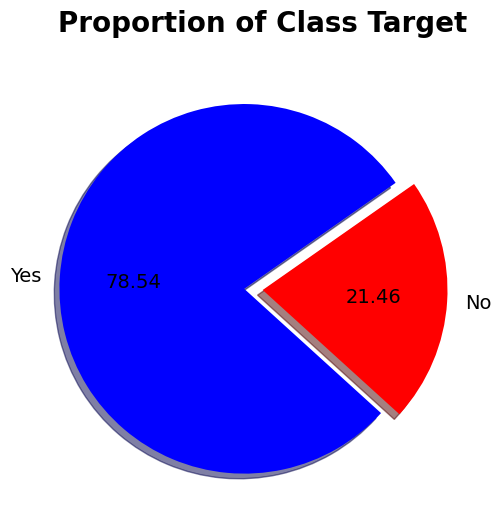

In [126]:
# Distribution of training target
plt.figure(figsize=(6,6))
plt.pie(
        y_train.value_counts(),
        autopct='%.2f',
        explode=[0.1,0],
        labels=["Yes","No"],
        shadow=True,
        textprops={'fontsize': 14},
        colors=["blue","red"],
        startangle=35)

plt.title("Proportion of Class Target",fontsize=20, fontweight='bold', pad=20)
plt.show()

# **Exploratory Data Analysis**

In [127]:
df_cred = pd.read_csv('/content/drive/MyDrive/IDX Partners/df_cred.csv')
df_cred.head(2)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,Teacher,10+ years,RENT,24000.0,Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,1985-01-01,1.0,0.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,2015-01-01,171.62,2016-01-01,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,37,31
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,0,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,1999-04-01,5.0,0.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,16,14


# **Siapa saja peminjam kami?**

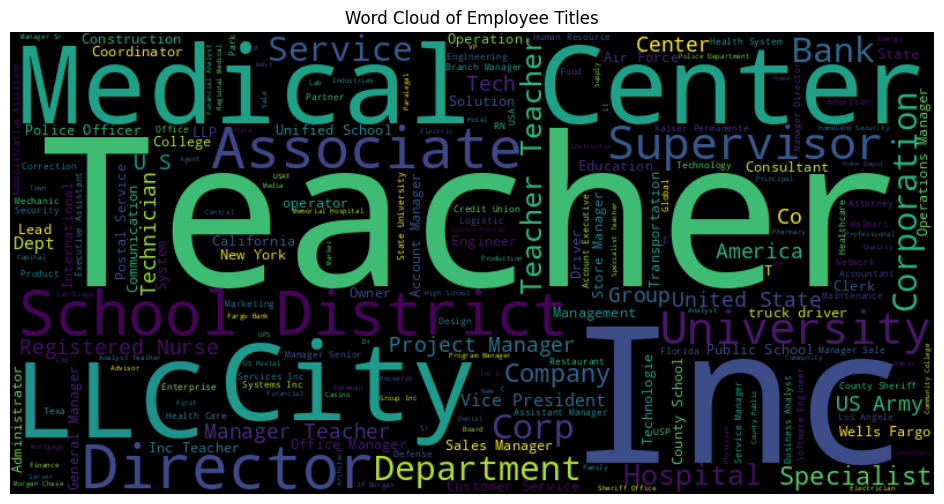


Top 10 Job Titles:
              Job Title  Frequency
0               Teacher      15023
29326           Manager       1597
29528                RN        712
29356  Registered Nurse        708
29436        Supervisor        703
29382   Project Manager        555
29442             Sales        550
29440           manager        481
145             US Army        470
29499    Office Manager        462


In [128]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

text = ' '.join(str(emp) for emp in df_cred['emp_title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Employee Titles")
plt.show()

frequencies = Counter(df_cred['emp_title'].dropna())

freq_df = pd.DataFrame(frequencies.items(), columns=['Job Title', 'Frequency'])
freq_df = freq_df.sort_values(by='Frequency', ascending=False)

print("\nTop 10 Job Titles:")
print(freq_df.head(10))

# **Apakah lamanya masa kerja mempengaruhi baik buruknya pinjaman?**

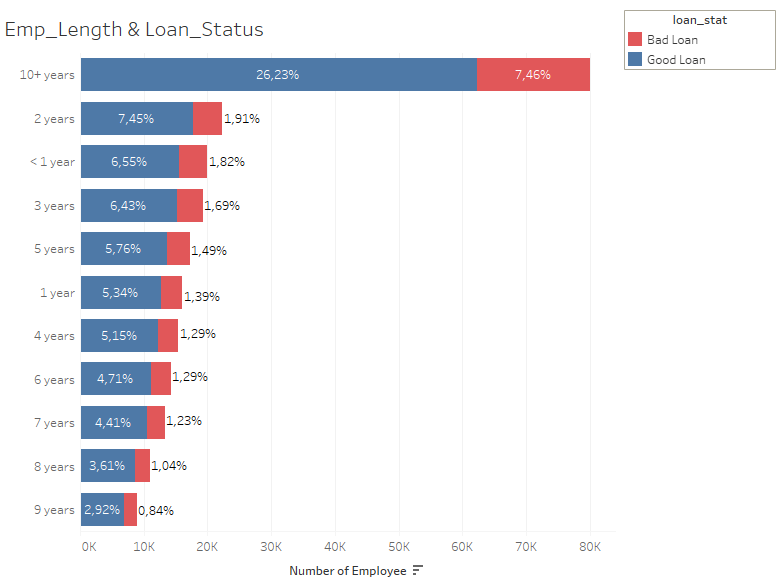

# **Mengapa peminjam kami mengambil pinjaman kredit?**

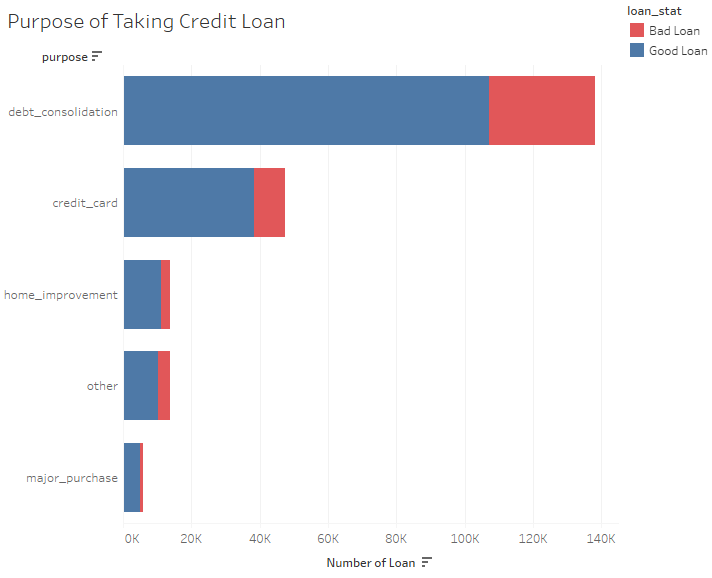

# **Apa yang dapat disimpulkan dari pinjaman baik atau buruk berdasarkan jumlah pembayaran pinjaman (jangka waktu)?**

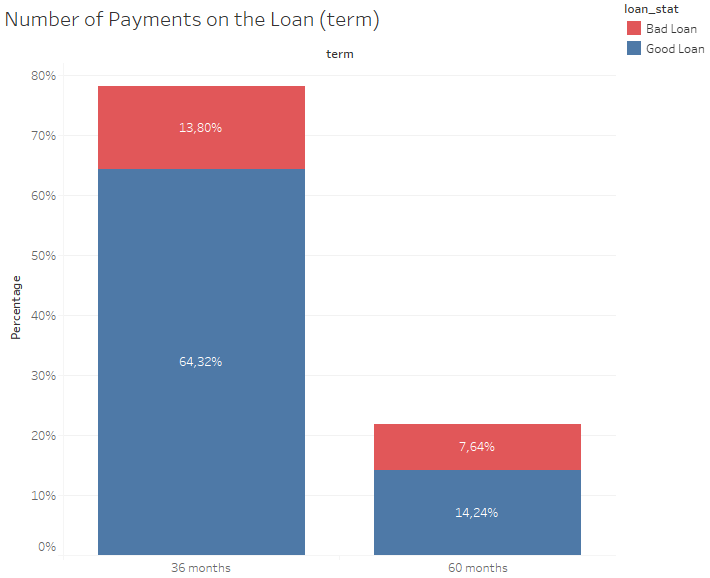

# **Bagaimana dengan menggolongkan tingkatan terhadap peminjam dan status pinjaman kita?**

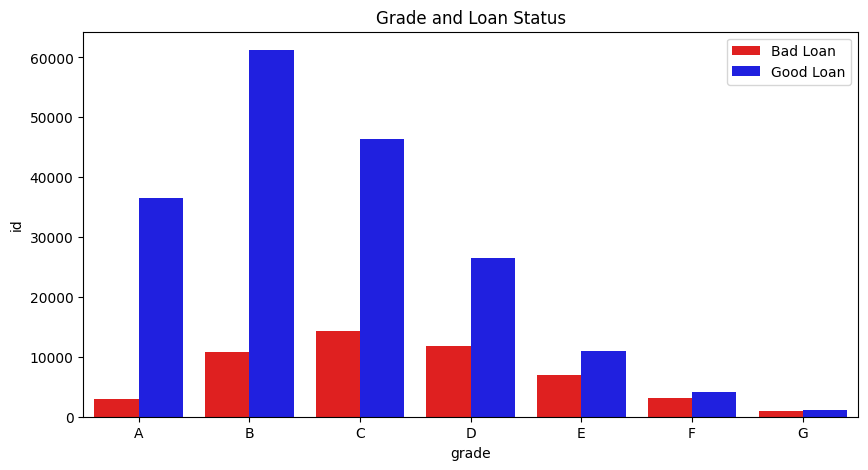

In [129]:

plt.figure(figsize=(10,5))
grade_loan = df_cred.groupby(['grade', 'loan_status'])['id'].count().reset_index()
# plot with seaborn barplot
p = sns.barplot(data=grade_loan, x='grade', y='id', hue='loan_status',palette=['red','blue'])
plt.title("Grade and Loan Status")
legend_labels, _= p.get_legend_handles_labels()
p.legend(legend_labels,['Bad Loan', 'Good Loan'])
plt.show(p)

# **Modelling**

In [130]:
df_train_feat = pd.read_csv('/content/drive/MyDrive/IDX Partners/df_train_feat.csv')
df_train_feat.head(2)

,term,int_rate,installment,grade,emp_length,annual_inc,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year,SubGrade_A,SubGrade_B,SubGrade_C,SubGrade_D,SubGrade_E,SubGrade_F,SubGrade_G,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_major_purchase,purpose_other,purpose_private_use,purpose_small_business,initial_list_status_f,initial_list_status_w
0,36,10.65,162.87,5,10,24000.0,0,27.65,0.0,1.0,0.0,3.0,0.0,83.7,0.0,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31,0,2,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,60,15.27,59.83,4,0,30000.0,0,1.00,0.0,5.0,0.0,3.0,0.0,9.4,0.0,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14,0,0,4,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [131]:
df_train_target = pd.read_csv('/content/drive/MyDrive/IDX Partners/df_train_target.csv')
df_train_target['loan_status']

,loan_status
0,1
1,0
2,1
3,1
4,1
...,...
230232,0
230233,0
230234,1
230235,0


In [132]:
from collections import Counter
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train_feat, df_train_target['loan_status'], test_size=0.3,
                                                    random_state=42, stratify=df_train_target)
print('Class from training data df_train',Counter(y_train))

print('Class from testing data df_test',Counter(y_test))

Class from training data df_train Counter({1: 126579, 0: 34586})
Class from testing data df_test Counter({1: 54249, 0: 14823})


In [133]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from imblearn.over_sampling import SMOTE

def log_transform(x):
  return np.log(x + 1)

# Pipeline to transform the numerical features
numerical = ['int_rate','installment','annual_inc','dti','delinq_2yrs','inq_last_6mths','mths_since_last_delinq','open_acc',
             'revol_util','total_rec_late_fee','collection_recovery_fee','last_pymnt_amnt','mths_since_last_major_derog','tot_coll_amt',
             'tot_cur_bal','total_rev_hi_lim','pymnt_time','credit_pull_year']
skewed = ['installment','annual_inc','delinq_2yrs','inq_last_6mths','mths_since_last_delinq','open_acc',
          'revol_util','total_rec_late_fee','collection_recovery_fee','last_pymnt_amnt','mths_since_last_major_derog','tot_coll_amt',
          'tot_cur_bal','total_rev_hi_lim','pymnt_time','credit_pull_year']
diff = list(set(numerical) - set(skewed))

smt = SMOTE(random_state=42)
ss = StandardScaler()
log_transformer = FunctionTransformer(log_transform) # remainder='passthrough'

numerical_transformer = Pipeline([('log', log_transformer),('ss', ss)])
ct = ColumnTransformer([('num_transformer', numerical_transformer, skewed), ('scaler', ss, diff)], remainder='passthrough')

In [134]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from scipy.stats import ks_2samp
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

In [135]:
def evaluate_ks_and_roc_auc(y_real, y_proba):
    # Unite both visions to be able to filter
    df = pd.DataFrame()
    df['real'] = y_real
    df['proba'] = y_proba[:, 1]

    # Recover each class
    class0 = df[df['real'] == 0]
    class1 = df[df['real'] == 1]

    ks = ks_2samp(class0['proba'], class1['proba'])
    roc_auc = roc_auc_score(df['real'] , df['proba'])

    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"KS: {ks.statistic:.4f} (p-value: {ks.pvalue:.3e})")
    return ks.statistic, roc_auc

In [136]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

Training is success!
ROC AUC: 0.9767
KS: 0.8903 (p-value: 0.000e+00)
Classification report Logistic Regression : 
               precision    recall  f1-score   support

           0       0.82      0.93      0.87     14823
           1       0.98      0.94      0.96     54249

    accuracy                           0.94     69072
   macro avg       0.90      0.94      0.92     69072
weighted avg       0.95      0.94      0.94     69072



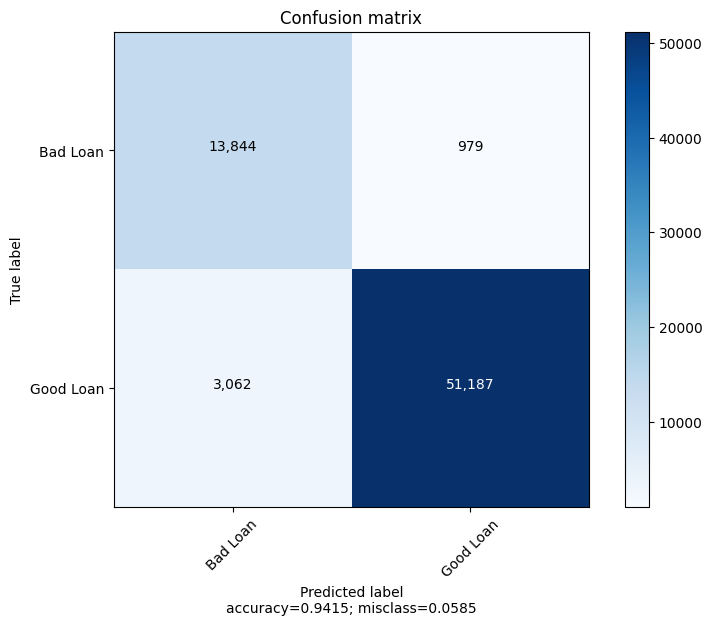

In [137]:
# Main pipeline for fitting.
model_LR = Pipeline([
                   ('column_transformer', ct),
                   ('smt', smt),
                   ('RF', LogisticRegression(random_state=42) )
          ])
model_LR.fit(X_train, y_train)
print("Training is success!")
y_pred = model_LR.predict_proba(X_test)
predicted = model_LR.predict(X_test)
#print AUC, KS score, and classification report
ks, auc = evaluate_ks_and_roc_auc(y_test, y_pred)
matrix = classification_report(y_test, predicted)
print('Classification report Logistic Regression : \n',matrix)
cm = confusion_matrix(y_test, predicted)
target_names = ["Bad Loan","Good Loan"]
plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)

In [138]:
len(model_LR.named_steps['RF'].coef_[0])

47

# **Random Forest**

Training is success!
ROC AUC: 0.9941
KS: 0.9440 (p-value: 0.000e+00)
Classification report Random Forest Classifier : 
               precision    recall  f1-score   support

           0       0.91      0.96      0.93     14823
           1       0.99      0.97      0.98     54249

    accuracy                           0.97     69072
   macro avg       0.95      0.97      0.96     69072
weighted avg       0.97      0.97      0.97     69072



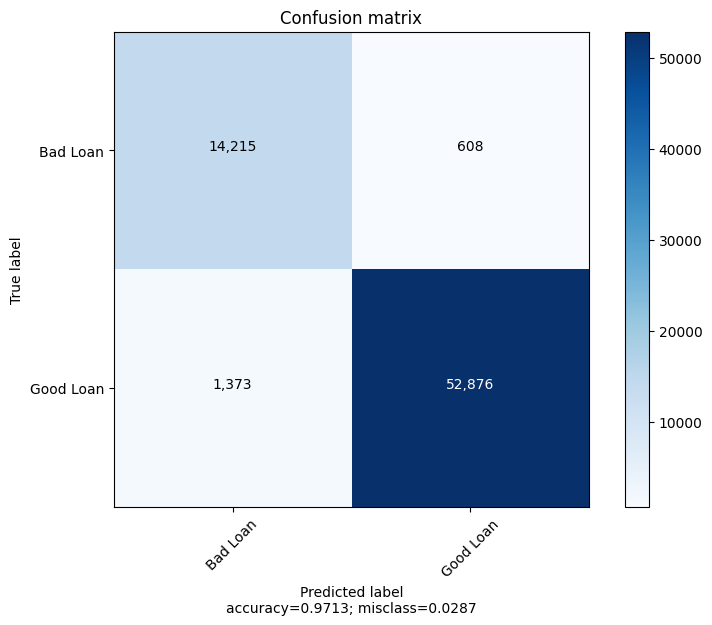

In [139]:
# Main pipeline for fitting.
model_RF = Pipeline([
                   ('column_transformer', ct),
                   ('smt', smt),
                   ('RF', RandomForestClassifier(random_state=42) )
          ])
model_RF.fit(X_train, y_train)
print("Training is success!")
y_pred = model_RF.predict_proba(X_test)
predicted = model_RF.predict(X_test)
#print AUC, KS score, and classification report
ks, auc = evaluate_ks_and_roc_auc(y_test, y_pred)
matrix = classification_report(y_test, predicted)
print('Classification report Random Forest Classifier : \n',matrix)
cm = confusion_matrix(y_test, predicted)
target_names = ["Bad Loan","Good Loan"]
plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)

# **Gradient Boosting Classifier**

Training is success!
ROC AUC: 0.9948
KS: 0.9428 (p-value: 0.000e+00)
Classification report Gradient Boosting Classifier : 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93     14823
           1       0.99      0.97      0.98     54249

    accuracy                           0.97     69072
   macro avg       0.94      0.97      0.95     69072
weighted avg       0.97      0.97      0.97     69072



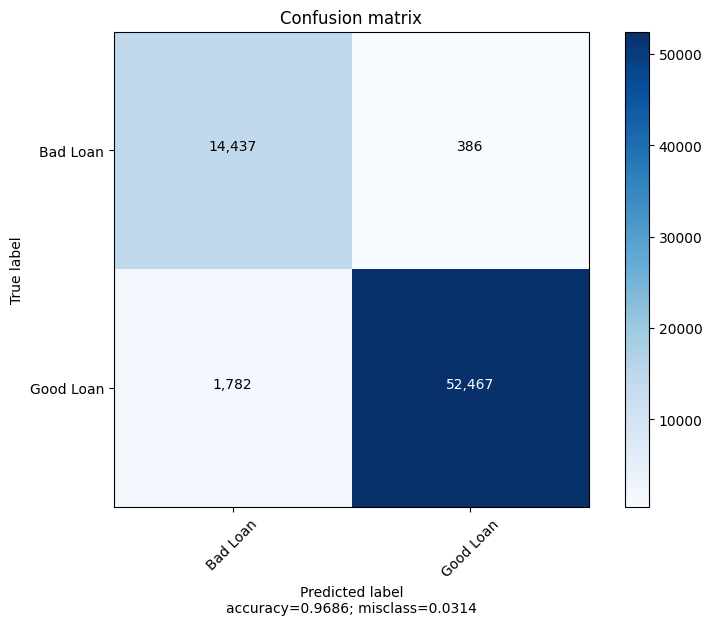

In [140]:
# Main pipeline for fitting.
model_GB = Pipeline([
                   ('column_transformer', ct),
                   ('smt', smt),
                   ('GB', GradientBoostingClassifier(random_state=42) )
          ])
model_GB.fit(X_train, y_train)
print("Training is success!")
y_pred = model_GB.predict_proba(X_test)
predicted = model_GB.predict(X_test)
#print AUC, KS score, and classification report
ks, auc = evaluate_ks_and_roc_auc(y_test, y_pred)
matrix = classification_report(y_test, predicted)
print('Classification report Gradient Boosting Classifier : \n',matrix)
cm = confusion_matrix(y_test, predicted)
target_names = ["Bad Loan","Good Loan"]
plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)

# **XGBoost Classifier**

Training is success!
ROC AUC: 0.9976
KS: 0.9627 (p-value: 0.000e+00)
Classification report XGBoost Classifier : 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     14823
           1       0.99      0.99      0.99     54249

    accuracy                           0.98     69072
   macro avg       0.97      0.98      0.98     69072
weighted avg       0.98      0.98      0.98     69072



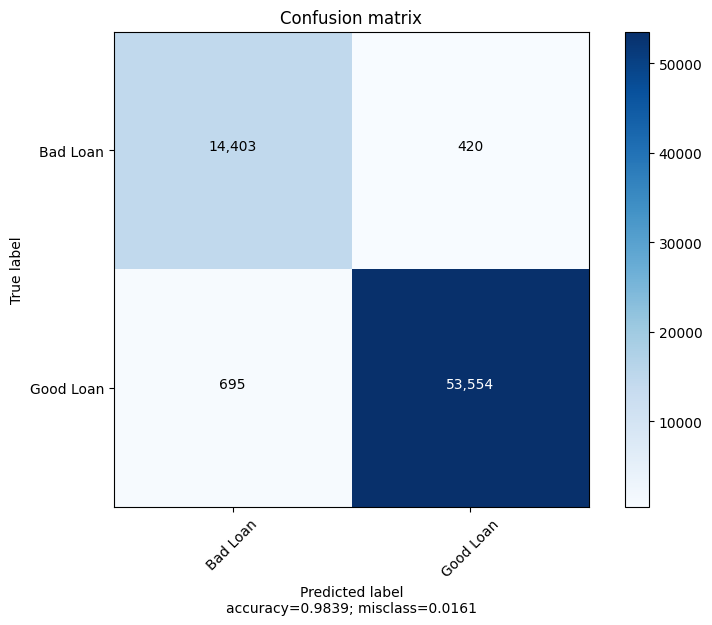

In [141]:
# Main pipeline for fitting.
model_XGB = Pipeline([
                   ('column_transformer', ct),
                   ('smt', smt),
                   ('XGB', xgb.XGBClassifier(objective="binary:logistic",random_state=42) )
          ])
model_XGB.fit(X_train, y_train)
print("Training is success!")
y_pred = model_XGB.predict_proba(X_test)
predicted = model_XGB.predict(X_test)
#print AUC, KS score, and classification report
ks, auc = evaluate_ks_and_roc_auc(y_test, y_pred)
matrix = classification_report(y_test, predicted)
print('Classification report XGBoost Classifier : \n',matrix)
cm = confusion_matrix(y_test, predicted)
target_names = ["Bad Loan","Good Loan"]
plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)

# **Voting Classifier**

Training is success!
ROC AUC: 0.9965
KS: 0.9507 (p-value: 0.000e+00)
Classification report Voting Classifier : 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94     14823
           1       0.99      0.98      0.98     54249

    accuracy                           0.98     69072
   macro avg       0.95      0.97      0.96     69072
weighted avg       0.98      0.98      0.98     69072



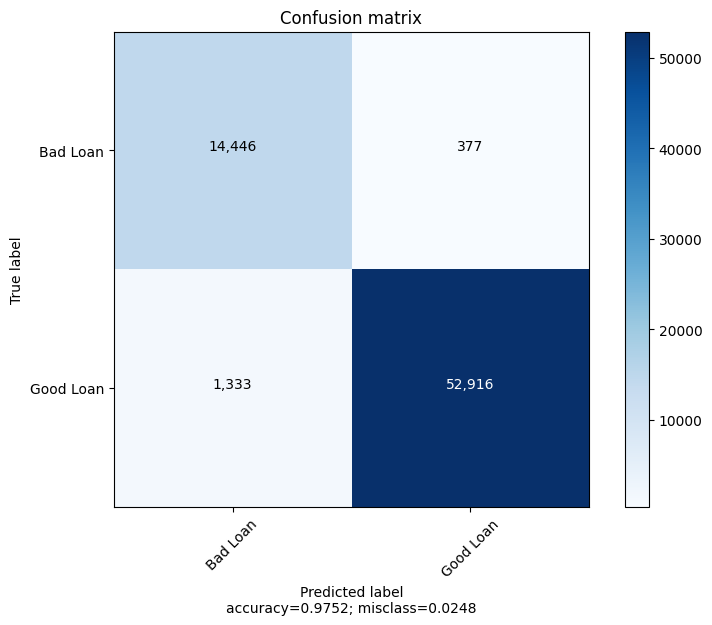

In [142]:
from sklearn.ensemble import VotingClassifier

clf1 = RandomForestClassifier(random_state=42)
clf2 = GradientBoostingClassifier(random_state=42)
clf3 = xgb.XGBClassifier(objective="binary:logistic",random_state=42)

# Main pipeline for fitting.
model_VC = Pipeline([
                   ('column_transformer', ct),
                   ('smt', smt),
                   ('VC', VotingClassifier(estimators=[('RF', clf1), ('GB', clf2), ('XGB', clf3)],
                        voting='soft', weights=[1,2,1]) )
          ])
model_VC.fit(X_train, y_train)
print("Training is success!")
y_pred = model_VC.predict_proba(X_test)
predicted = model_VC.predict(X_test)
#print AUC, KS score, and classification report
ks, auc = evaluate_ks_and_roc_auc(y_test, y_pred)
matrix = classification_report(y_test, predicted)
print('Classification report Voting Classifier : \n',matrix)
cm = confusion_matrix(y_test, predicted)
target_names = ["Bad Loan","Good Loan"]
plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)

# **Model Optimization & Evaluation**

## Hyperparameter Tuning

In [143]:
# Gradient Boosting
# n_jobs=-1 to allow run it on all cores
params = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.05,0.01,0,0.1]
}
# Main pipeline for fitting.
model_GB_HT = Pipeline([
                   ('column_transformer', ct),
                   ('smt', smt),
                   ('RF_HT', RandomizedSearchCV(GradientBoostingClassifier(random_state=42), params, n_jobs=-1,
                                                cv=KFold(n_splits=3), scoring='roc_auc', refit=True) )
          ])
model_GB_HT.fit(X_train, y_train)
print("Training is success!")
y_pred = model_GB_HT.predict_proba(X_test)
predicted = model_GB_HT.predict(X_test)
#print AUC, KS score, and classification report
ks, auc = evaluate_ks_and_roc_auc(y_test, y_pred)
matrix = classification_report(y_test, predicted)
print('Classification report tuned Gradient Boosting Classifier : \n',matrix)
cm = confusion_matrix(y_test, predicted)
target_names = ["Bad Loan","Good Loan"]
plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)


KeyboardInterrupt: 

In [ ]:

model_GB_HT.steps[2][1].best_params_

In [ ]:
# Main pipeline for fitting.
model_GB = Pipeline([
                   ('column_transformer', ct),
                   ('smt', smt),
                   ('GB', GradientBoostingClassifier(random_state=42,learning_rate=0.01,
                                                     max_depth=9,n_estimators=500) )
          ])
model_GB.fit(X_train, y_train)
print("Training is success!")
y_pred = model_GB.predict_proba(X_test)
predicted = model_GB.predict(X_test)
#print AUC, KS score, and classification report
ks, auc = evaluate_ks_and_roc_auc(y_test, y_pred)
matrix = classification_report(y_test, predicted)
print('Classification report Gradient Boosting Classifier : \n',matrix)
cm = confusion_matrix(y_test, predicted)
target_names = ["Bad Loan","Good Loan"]
plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)

# **Model Checking**

In [ ]:
scores_train = []
scores_test = []

lr = model_GB

kf = KFold(shuffle=True,random_state=42, n_splits=5) #random_state equals to previous train_test_split
# shuffle=True

for train_index, test_index in kf.split(df_train_feat):
  X_train = df_train_feat.take(list(train_index),axis=0)
  X_test = df_train_feat.take(list(test_index),axis=0)
  y_train, y_test = df_train_target.take(list(train_index),axis=0), df_train_target.take(list(test_index),axis=0)
  # Train the training data
  lr.fit(X_train, y_train)
  # Predict training and testing
  y_train_pred = lr.predict(X_train)
  y_pred = lr.predict(X_test)
  # Evaluating training and testing
  score_train = mean_absolute_error(y_train, y_train_pred)
  score_test = mean_absolute_error(y_test, y_pred)
  scores_train.append(score_train)
  scores_test.append(score_test)

folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, scores_train, 'o-', color='green', label='train')
plt.plot(folds, scores_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Mean Absolute Error')
plt.title('K-Fold Validation Gradient Boosting Classifier')
plt.show()

# **Model Interpretation**

In [144]:
def compute_feature_importance(voting_clf, weights):
    """ Function to compute feature importance of Voting Classifier """

    feature_importance = dict()
    for est in voting_clf.estimators_:
        feature_importance[str(est)] = est.feature_importances_
    fe_scores = [0]*len(list(feature_importance.values())[0])
    for idx, imp_score in enumerate(feature_importance.values()):
        imp_score_with_weight = imp_score*weights[idx]
        fe_scores = list(np.add(fe_scores, list(imp_score_with_weight)))
    return fe_scores

In [145]:
feature_importance = pd.DataFrame()
feature_importance['features'] = X_train.columns
feature_importance['importance'] = model_GB.named_steps['GB'].feature_importances_

<Figure size 3000x1000 with 0 Axes>

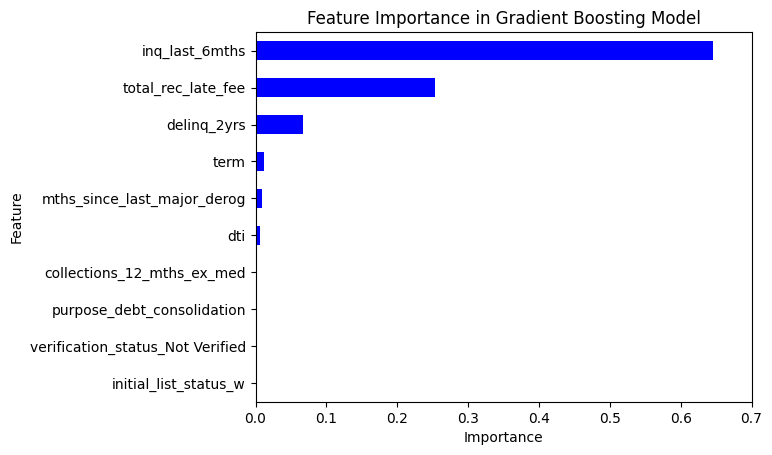

In [146]:
plt.figure(figsize=(30,10))
plot = feature_importance.sort_values('importance', ascending = False).head(10).plot.barh(color='blue',legend=None)
plot.set_yticklabels(feature_importance.sort_values('importance', ascending = False).head(10).features)
plt.title('Feature Importance in Gradient Boosting Model')
plt.xlim([0,0.7])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

3 fitur utama yang penting dalam memprediksi risiko kredit baik atau buruk:
*   inq_last_6mths: Jumlah permintaan kredit dalam 12 bulan terakhir
*   total_rec_late_fee: Biaya keterlambatan yang diterima hingga saat ini
*   delinq_2yrs: Jumlah insiden tunggakan lebih dari 30 hari dalam berkas kredit peminjam selama 2 tahun terakhir